# Proyecto 2: Ingeniería de features, Modelos avanzados e Interpretación de modelos

### Parte A: Transformación de Datos
##### **Implementar al menos tres de las transformaciones de datos propuestas.**
- [x] Detección y eliminación de Outliers
- [x] Encoding
- [x] Imputación de valores faltantes
- [x] Escalado de Datos
- [ ] Generación de nuevas variables predictorias/reducción de dimensionalidad (SVD/PCA)

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

##### **A tener en cuenta (aspectos evaluados en la Parta A):**
- Debes justificar por qué creés que las transformaciones elegidas aplican en este dataset.
- Debes re entrenar un modelo del Proyecto 01 y comparar su desempeño con el modelo obtenido en el Proyecto 01.

### Parte B: Modelos Avanzados
##### **Al menos un modelo debe ser optimizado por Grid Search o Random Search; el otro puede ser optimizado por búsqueda manual (es decir, puedes dejar los mejores parámetros que encontraste probando ).**
- [x] Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización).       Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
- [x] Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
- [x] Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

##### **A tener en cuenta (aspectos evaluados en la Parta B):**
- En la optimización de hiperparámetros, debes justificar los parámetros que elegiste para optimizar y el rango de cada uno.

### Parte C: Interpretación de los modelos
#### De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:
##### **Responder al menos una pregunta. Obviamente, ¡cuanto más hagas, más aprenderás y mejor será tu proyecto!**
- [x] ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
- [x] ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

##### **A tener en cuenta (aspectos evaluados en la Parta C):**
- Debes estudiar qué variables utiliza el modelo para predecir y responder la pregunta: ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
- Es muy importante que analices los errores del modelo. ¿Dónde es mayor el error? ¿dónde acierta?
- Debes ser crítico/a con la metodología utilizada. ¿Qué mejorarías?

--------------------------------------------------------------------------------------------

#### A lo largo del Proyecto 1 trabajé en este mismo dataset, hice un preprocesamiento sencillo y varios modelos de ML básicos con los que obtuve los siguientes resultados:
- El dataset con el que partí contaba con **91485 instancias** (a partir del checkpoint) y al finalizar el preprocesamiento este tenía **68438 instancias**.
- Entrené 3 modelos de ML, con los cuales obtuve los siguientes resultados:
    - Regresión Lineal: RMSE en Train: 45588. RMSE en Test: 45175.
    - Árbol de decisión (Optimizado): RMSE en Train: 25103. RMSE en Test: 39110.
    - Vecinos más cercanos (Optimizado): RMSE en Train: 29726. RMSE en Test: 41928. 

Las mejoras que haré a mi dataset y modelo de ML tendrán como intención mejorar este desempeño

--------------------------------------------------------------------------------------------

#### Importo las librerias a utilizar:

In [306]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as math
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#### Cargo el Dataset:

In [307]:
data = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


#### Para una mejor visualización y para facilitar el trabajo de aquí en adelante, removeré aquellas columnas que no utilizaré:
- **lat y lon**: Ambas columnas no me aportan información para el trabajo, para trabajar con la ubicación de las propiedades utilizaré la columna **l3**.
- **currency**: No utilizaré esta columna ya que toma un único valor (USD) con lo cual no aporta información alguna.
- **operation_type**: Sucede exactamente lo mismo que con **currency**.
- **l1**: Sucede exactamente lo mismo que con **currency**.
- **start_date, end_date, created_on**: Dichas columnas no me aportan información que vaya a utilizar.

In [308]:
data = data.drop(columns = ["lat", "lon", "operation_type", "currency", "l1", "start_date", "end_date", "created_on"])
data.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH


#### Eliminaré aquellas instancias cuyo `property_type` no sea ni: `Departamento`, `Casa` o `PH`. Y también aquellas cuyo `l2` no sea `Capital Federal`.

In [309]:
mascara = np.logical_and(data.property_type.isin(["Departamento", "Casa", "PH"]), data.l2 == "Capital Federal")
data = data[mascara]
data = data.drop(columns = ['l2']) #Ya no es util esta columna.

In [310]:
print(data.shape)
data.head()

(91485, 10)


,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH


Veamos cuantas instancias tienen `surface_covered` mayor a `surface_total`:

In [311]:
data_err = data[data.surface_covered > data.surface_total]
data_err.shape

(760, 10)

In [312]:
data_err.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
446,Villa Santa Rita,5.0,4.0,3.0,230.0,244.0,490000.0,VENTA CASA 5 AMBIENTES,Corredor Responsable: Mónica Silvia Martinuzzi...,Casa
859,Belgrano,3.0,2.0,1.0,43.0,44.0,133000.0,Departamento 3 ambientes.Belgrano,Corredor Responsable: Gustavo Guastello - C.U....,Departamento
924,Villa Pueyrredón,3.0,2.0,1.0,65.0,66.0,187000.0,VENTA DEPTO 3 AMB VILLA PUEYRREDON CON COCHERA,Corredor Responsable: EMMA A. PIERSIMONI - CPI...,Departamento
1329,Recoleta,2.0,1.0,2.0,44.0,45.0,235000.0,DIVINO 2 AMB BAÑO Y TOIL RECICLADO POR ARQUITECTO,Corredor Responsable: KARINA QUINTEROS - CUCIC...,Departamento
1438,Congreso,3.0,2.0,1.0,78.0,79.0,235000.0,Venta dep-Congreso 3 amb-Restaurado-Impecable-,Corredor Responsable: Ariel Champanier - C.U.C...,Departamento


#### Al ver que se trata de tan solo 760 instancias las eliminaré, ya que se trata de un error de ingreso de los datos y como se trata de pocas instancias no va a afectar mi modelo.

In [313]:
# Obtengo una lista con los índices de las instancias que contienen dicho error.
indices_errores = list(data_err.index.values.tolist()) 

In [314]:
# Extraemos del dataset dichas instancias.
data = data.drop(indices_errores)

In [315]:
data.shape

(90725, 10)

#### Veamos la cantidad de valores faltantes por columna:

In [316]:
print("Los valores faltantes en cada columna son: ")
print("---------------------------------------------------------------------------")
print(data.isna().sum())
print("---------------------------------------------------------------------------")

Los valores faltantes en cada columna son: 
---------------------------------------------------------------------------
l3                    0
rooms                 0
bedrooms              0
bathrooms          2163
surface_total      8917
surface_covered    9235
price                 0
title                 0
description           0
property_type         0
dtype: int64
---------------------------------------------------------------------------


Mas adelante, en la parte A, vamos a trabajar dichos valores.

Haré un breve análisis del Dataset para luego comenzar con el preprocesamiento.

#### Veo estadísticos descriptivos del Dataset:

In [317]:
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,90725.000000,90725.000000,88562.000000,81808.000000,81490.00000,9.072500e+04
mean,2.960904,1.957718,1.560060,112.757909,92.18887,2.597473e+05
std,1.304515,1.067473,0.858432,985.155870,768.85138,3.229361e+05
min,1.000000,0.000000,1.000000,12.000000,1.00000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.00000,1.216350e+05
50%,3.000000,2.000000,1.000000,71.000000,63.00000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.00000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.00000,3.243423e+07


#### Veo la cantidad de instancias por tipo de propiedad:

Los tipos de propiedades y sus cantidades de instancias son: 
---------------------------------------------------------------------------
Departamento    78498
PH               9724
Casa             2503
Name: property_type, dtype: int64
---------------------------------------------------------------------------


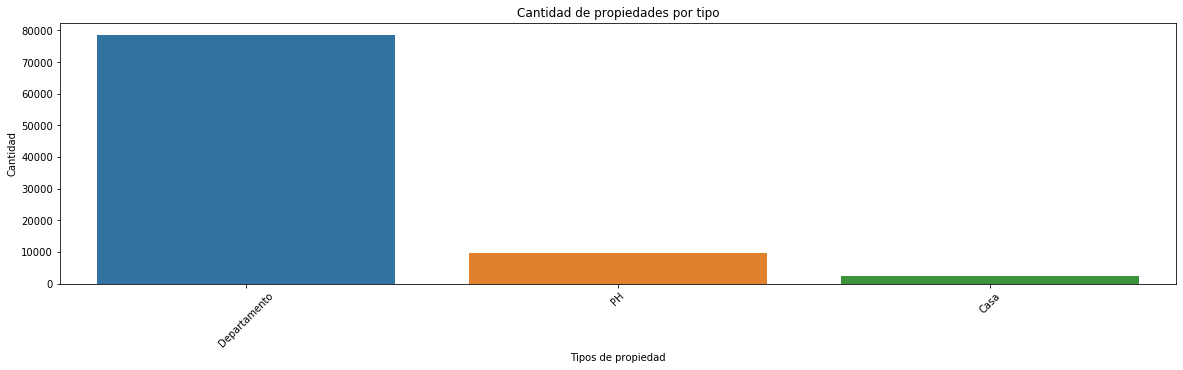

In [318]:

print("Los tipos de propiedades y sus cantidades de instancias son: ")
print("---------------------------------------------------------------------------")
print(data["property_type"].value_counts())
print("---------------------------------------------------------------------------")


plt.figure(figsize = (20,4.8))
sns.countplot(data = data, x = "property_type")
plt.xticks(rotation = 45)
plt.ylabel("Cantidad")
plt.xlabel("Tipos de propiedad")
plt.title("Cantidad de propiedades por tipo")
plt.show()

#### Veo la cantidad de instancias por barrio de Capital Federal:

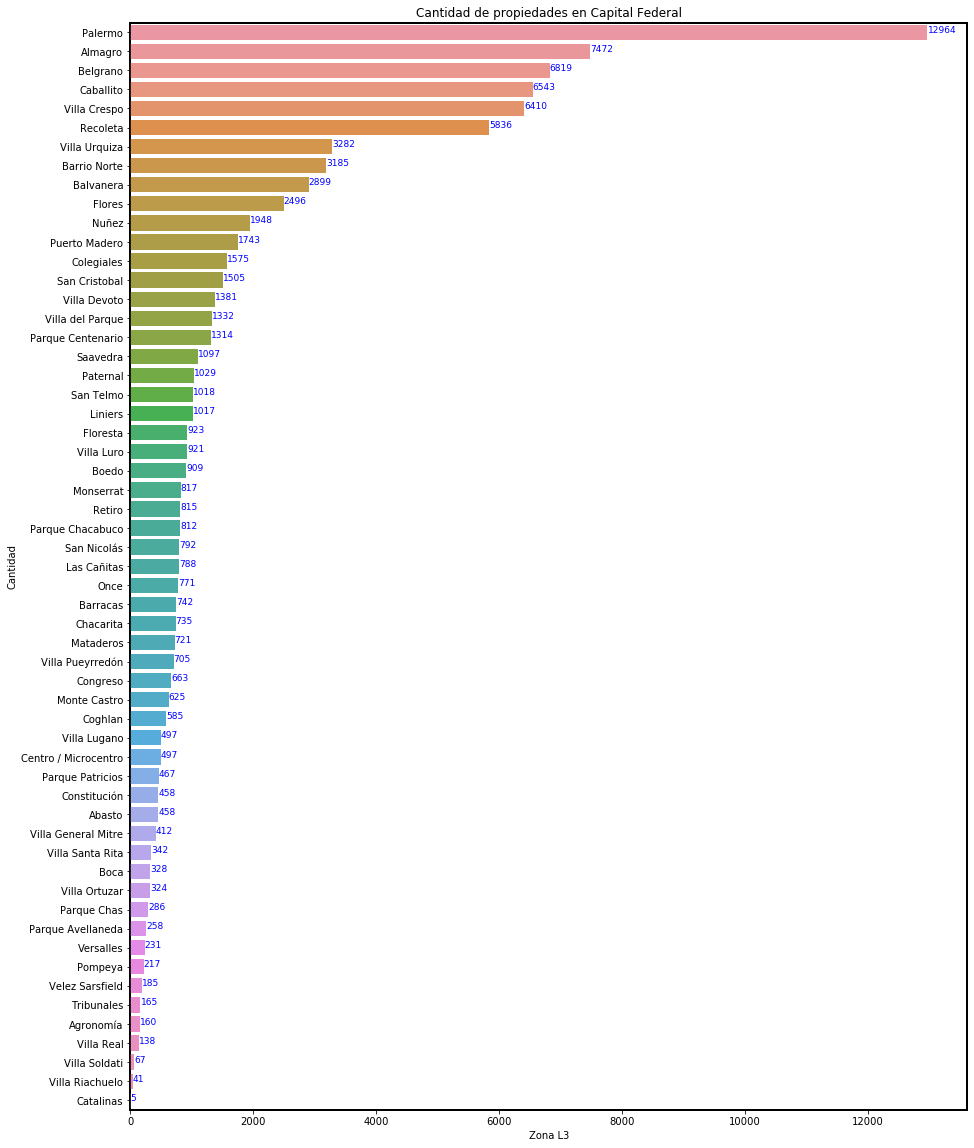

In [319]:
l3_df = data.groupby(['l3']).size().to_frame(name = 'Cantidad').reset_index()
l3_df.sort_values(by='Cantidad', ascending=False, inplace=True)
l3_df.reset_index(drop=True, inplace=True)

fig, ax1 = plt.subplots()
fig.set_size_inches(15, 20)

ax1.patch.set_edgecolor('black') 
ax1.patch.set_linewidth('2') 

g2 = sns.barplot(data = l3_df, y="l3", x="Cantidad",  ax=ax1, dodge=False)

for index, row in l3_df.iterrows():
    g2.text(row.Cantidad,row.name, row.Cantidad, color='blue',fontsize=9)

g2.set(xlabel='Zona L3', ylabel='Cantidad', title='Cantidad de propiedades en Capital Federal')
plt.show()

## Parte A: Transformación de Datos

### **Detección y eliminación de Outliers**

A partir de lo visto en el Proyecto 1 el dataset cuenta con un gran número de valores outliers en las columnas `bathrooms`, `bedrooms`, `rooms`, `surface_total` y `surface_covered`. Por este motivo realizaré la detección y posterior eliminación de dichos valores outliers.

Comenzaré por definir las dos funciones que utilizaré en esta sección (Utilizaré el método del rango intercuartilico ya que es más sensible a la presencia de valores outliers y me será más fácil de visualizar su impacto al utilizar los boxplots).

In [320]:
def iqr(x):
    x = x[np.isfinite(x)]
    x = np.sort(x)
    iqr1 = np.percentile(x,75) - np.percentile(x,25)
    minimo = np.percentile(x,25) - 1.5*iqr1
    maximo = np.percentile(x,75) + 1.5*iqr1
    return iqr1, minimo, maximo

**Al igual que en el Proyecto 1 trabajaré cada tipo de propiedad (Departamento, Casa, PH) por separado, esto se debe a que la distribución de sus atributos difiere mucho entre sí.**

In [321]:
df = data.copy(deep = False)
deptos = df[df.property_type == "Departamento"]
phs = df[df.property_type == "PH"]
casas = df[df.property_type == "Casa"]

#### Veamos los valores outliers en cada columna por separado:

## surface_total 

In [322]:
datasets = [deptos, casas, phs]
nombres = ["Departamento", "Casa", "PH"]
for i, prop in enumerate(datasets):
    iqr1, minimo, maximo = iqr(prop.surface_total)
    print(nombres[i]+":")
    print("El valor del IQR es: " + str(iqr1))
    print("El valor mínimo es: " + str(minimo))
    print("El valor máximo es: " + str(maximo))

Departamento:
El valor del IQR es: 51.0
El valor mínimo es: -28.5
El valor máximo es: 175.5
Casa:
El valor del IQR es: 170.0
El valor mínimo es: -87.0
El valor máximo es: 593.0
PH:
El valor del IQR es: 82.0
El valor mínimo es: -53.0
El valor máximo es: 275.0


#### Como en los tres casos el mínimo resulta ser negativo, filtraré aquellas instancias que en cada caso estén por debajo del percentil 1.

In [323]:
def filtro(x):
    x = x[np.isfinite(x)]
    x = np.sort(x)
    iqr = np.percentile(x,75) - np.percentile(x,25)
    minimo = np.percentile(x,1)
    maximo = np.percentile(x,75) + 1.5*iqr
    return iqr1, minimo, maximo

In [324]:
datasets = [deptos, casas, phs]
nombres = ["Departamento", "Casa", "PH"]
for i, prop in enumerate(datasets):
    iqr1, minimo, maximo = filtro(prop.surface_total)
    print(nombres[i]+":")
    print("El valor del IQR es: " + str(iqr1))
    print("El valor mínimo es: " + str(minimo))
    print("El valor máximo es: " + str(maximo))

Departamento:
El valor del IQR es: 82.0
El valor mínimo es: 26.0
El valor máximo es: 175.5
Casa:
El valor del IQR es: 82.0
El valor mínimo es: 56.0
El valor máximo es: 593.0
PH:
El valor del IQR es: 82.0
El valor mínimo es: 35.0
El valor máximo es: 275.0


#### Realizamos el filtrado en cada tipo de propiedad:

In [325]:
deptos_f = deptos[((deptos.surface_total >= 26) & (deptos.surface_total <= 175.5)) | (deptos.surface_total.isna())]
casas_f = casas[((casas.surface_total >= 56) & (casas.surface_total <= 593)) | (casas.surface_total.isna())]
phs_f = phs[((phs.surface_total >= 35) & (phs.surface_total <= 275)) | (phs.surface_total.isna())]

#En caso de que surface_total sea NaN filtro tambien por surface_covered
deptos_f = deptos_f[(deptos_f.surface_covered <= 175.5) | (deptos_f.surface_covered.isna())]
casas_f = casas_f[(casas_f.surface_covered <= 593) | (casas_f.surface_covered.isna())]
phs_f = phs_f[(phs_f.surface_covered <= 275) | (phs_f.surface_covered.isna())]

#### Veamos, a partir del boxplot, la diferencia en la distribución de `surface_total` en cada tipo de propiedad:

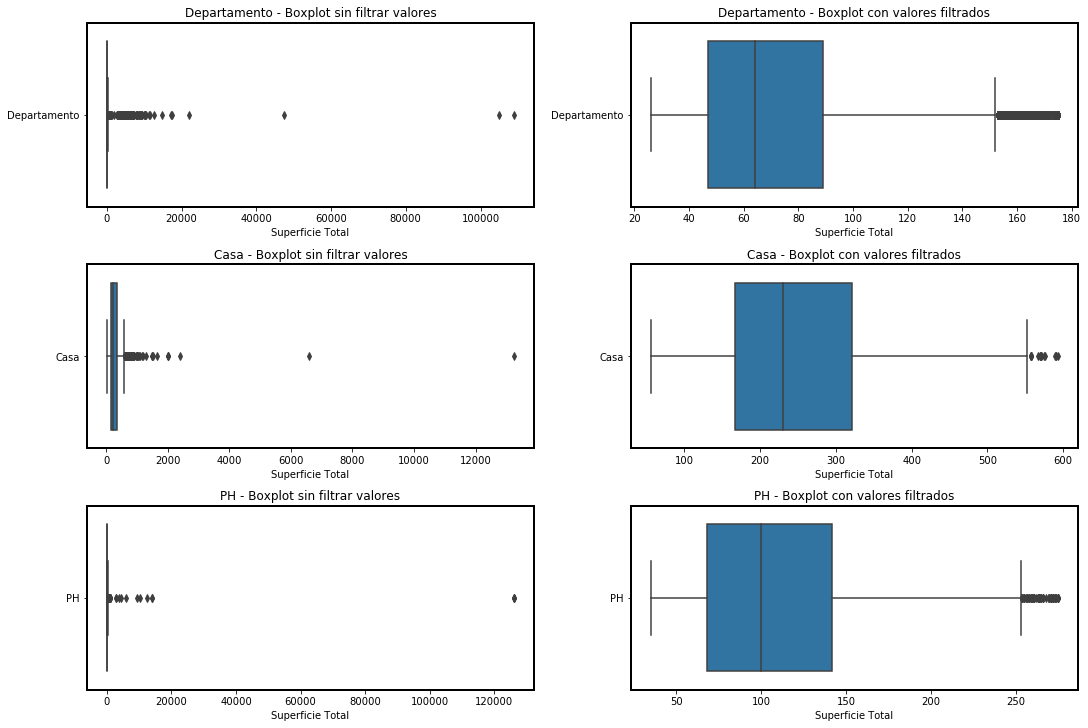

In [326]:
fig, axes = plt.subplots(3, 2, figsize=(15,10), constrained_layout=True)
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()
   
ax1.patch.set_edgecolor('black') 
ax1.patch.set_linewidth('2')  

ax2.patch.set_edgecolor('black') 
ax2.patch.set_linewidth('2')  

ax3.patch.set_edgecolor('black') 
ax3.patch.set_linewidth('2')  

ax4.patch.set_edgecolor('black') 
ax4.patch.set_linewidth('2')  

ax5.patch.set_edgecolor('black') 
ax5.patch.set_linewidth('2')  

ax6.patch.set_edgecolor('black') 
ax6.patch.set_linewidth('2') 

datasets = [deptos, deptos_f, casas, casas_f, phs, phs_f]
nombres = ["Departamento", "Departamento", "Casa", "Casa", "PH", "PH"]
titulos = ["sin filtrar valores", "con valores filtrados", "sin filtrar valores", "con valores filtrados", "sin filtrar valores", "con valores filtrados"]
for i, ax_ in enumerate([ax1, ax2, ax3, ax4, ax5, ax6]):
        g1 = sns.boxplot(data = datasets[i] , y = "property_type", x ="surface_total" , ax = ax_)
        g1.set(xlabel="Superficie Total", ylabel="", title=str(nombres[i]) + " - Boxplot " + titulos[i])

#### Veamos cuales son las instancias con valores pequeños de `surface_covered` (menores a los usados para filtrar por `surface_total`)

In [327]:
deptos_f[deptos_f.surface_covered < 26].surface_covered.value_counts().sort_index()

1.0     35
2.0      4
3.0      8
4.0      5
5.0      2
7.0      1
8.0      2
10.0     1
15.0     1
17.0     5
18.0    17
19.0     6
20.0     8
21.0     9
22.0    14
23.0    43
24.0    83
25.0    87
Name: surface_covered, dtype: int64

#### Para el caso de los departamentos tomare como mínimo 22 ya que los otros valores no tienen sentido.

In [328]:
deptos_f = deptos_f[(deptos_f.surface_covered >= 22) | (deptos_f.surface_covered.isna())]

In [329]:
casas_f[casas_f.surface_covered < 56].surface_covered.value_counts().sort_index()

44.0    1
48.0    3
49.0    1
50.0    1
51.0    1
52.0    3
55.0    2
Name: surface_covered, dtype: int64

#### A partir de esto se concluye que no hay valores atípicos en el caso de las casas.

In [330]:
phs_f[phs_f.surface_covered < 35].surface_covered.value_counts().sort_index()

1.0     12
17.0     2
24.0     2
25.0     3
26.0     2
27.0     2
28.0     2
29.0     9
30.0    11
31.0     7
32.0    11
33.0     8
34.0    19
Name: surface_covered, dtype: int64

#### Aquí tomaré como mínimo 24 ya que 17 y 1 son valores atípicos.

In [331]:
phs_f = phs_f[(phs_f.surface_covered >= 24) | (phs_f.surface_covered.isna())]

## price

In [332]:
datasets = [deptos, casas, phs]
nombres = ["Departamento", "Casa", "PH"]
for i, prop in enumerate(datasets):
    iqr1, minimo, maximo = iqr(prop.price)
    print(nombres[i]+":")
    print("El valor del IQR es: " + str(iqr1))
    print("El valor mínimo es: " + str(minimo))
    print("El valor máximo es: " + str(maximo))

Departamento:
El valor del IQR es: 150100.0
El valor mínimo es: -105250.0
El valor máximo es: 495150.0
Casa:
El valor del IQR es: 230000.0
El valor mínimo es: -105000.0
El valor máximo es: 815000.0
PH:
El valor del IQR es: 135000.0
El valor mínimo es: -67500.0
El valor máximo es: 472500.0


#### Como en los tres casos el mínimo resulta ser negativo, filtraré aquellas instancias que en cada caso estén por debajo del percentil 1.

In [333]:
datasets = [deptos, casas, phs]
nombres = ["Departamento", "Casa", "PH"]
for i, prop in enumerate(datasets):
    iqr1, minimo, maximo = filtro(prop.price)
    print(nombres[i]+":")
    print("El valor del IQR es: " + str(iqr1))
    print("El valor mínimo es: " + str(minimo))
    print("El valor máximo es: " + str(maximo))

Departamento:
El valor del IQR es: 135000.0
El valor mínimo es: 57000.0
El valor máximo es: 495150.0
Casa:
El valor del IQR es: 135000.0
El valor mínimo es: 85000.0
El valor máximo es: 815000.0
PH:
El valor del IQR es: 135000.0
El valor mínimo es: 65000.0
El valor máximo es: 472500.0


In [334]:
deptos_f = deptos_f[(deptos_f.price >= 57000) & (deptos_f.price <= 495150)]
casas_f = casas_f[(casas_f.price >= 85000) & (casas_f.price <= 815000)]
phs_f = phs_f[(phs_f.price >= 65000) & (phs_f.price <= 472500)]

#### Veamos, a partir del boxplot, la diferencia en la distribución de `price` en cada tipo de propiedad:

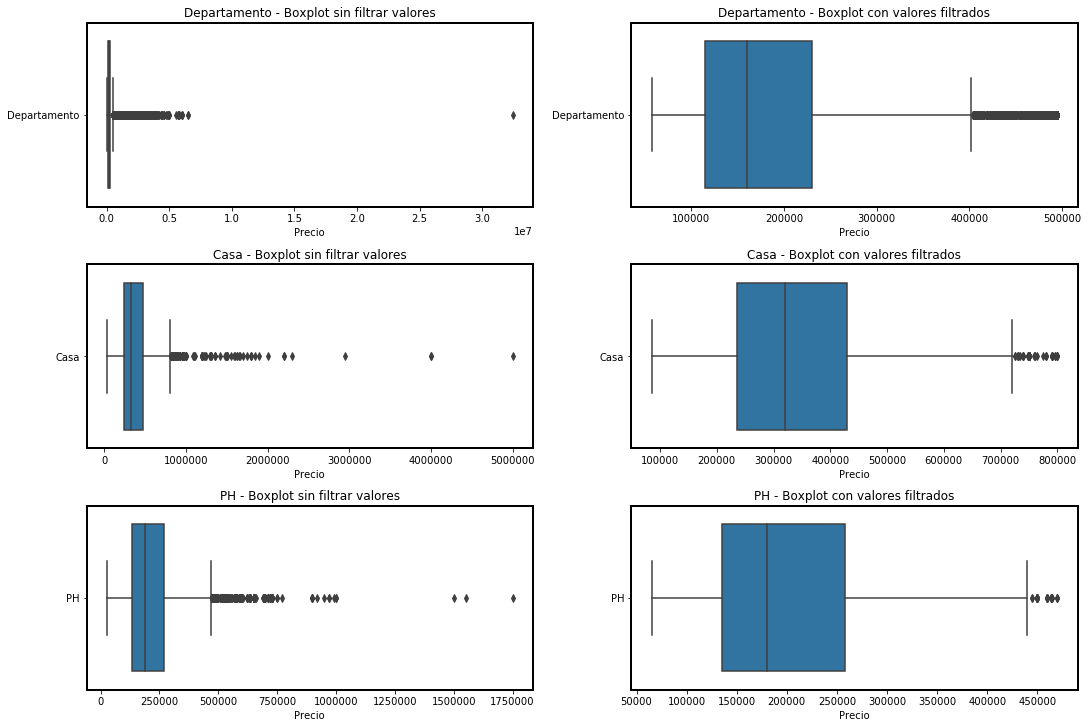

In [335]:
fig, axes = plt.subplots(3, 2, figsize=(15,10), constrained_layout=True)
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()
   
ax1.patch.set_edgecolor('black') 
ax1.patch.set_linewidth('2')  

ax2.patch.set_edgecolor('black') 
ax2.patch.set_linewidth('2')  

ax3.patch.set_edgecolor('black') 
ax3.patch.set_linewidth('2')  

ax4.patch.set_edgecolor('black') 
ax4.patch.set_linewidth('2')  

ax5.patch.set_edgecolor('black') 
ax5.patch.set_linewidth('2')  

ax6.patch.set_edgecolor('black') 
ax6.patch.set_linewidth('2') 

datasets = [deptos, deptos_f, casas, casas_f, phs, phs_f]
nombres = ["Departamento", "Departamento", "Casa", "Casa", "PH", "PH"]
titulos = ["sin filtrar valores", "con valores filtrados", "sin filtrar valores", "con valores filtrados", "sin filtrar valores", "con valores filtrados"]
for i, ax_ in enumerate([ax1, ax2, ax3, ax4, ax5, ax6]):
        g1 = sns.boxplot(data = datasets[i] , y = "property_type", x ="price" , ax = ax_)
        g1.set(xlabel="Precio", ylabel="", title=str(nombres[i]) + " - Boxplot " + titulos[i])

#### Veamos como resultan los estadísticos luego de realizar este primer filtrado:

In [336]:
print("Estadisticos Departamentos:")
print(deptos_f.describe())
print("-------------------------------------------------------------------------------------")
print("Estadisticos Casas:")
print(casas_f.describe())
print("-------------------------------------------------------------------------------------")
print("Estadisticos PH:")
print(phs_f.describe())

Estadisticos Departamentos:
              rooms      bedrooms     bathrooms  surface_total  surface_covered          price
count  68695.000000  68695.000000  66901.000000   60936.000000     60676.000000   68695.000000
mean       2.643613      1.704243      1.372401      69.376641        62.281940  185074.953636
std        0.998535      0.860339      0.635403      30.397169        26.841358   91735.689135
min        1.000000      0.000000      1.000000      26.000000        22.000000   57000.000000
25%        2.000000      1.000000      1.000000      46.000000        42.000000  115188.000000
50%        3.000000      2.000000      1.000000      62.000000        55.000000  160000.000000
75%        3.000000      2.000000      2.000000      85.000000        76.000000  230707.000000
max       21.000000     15.000000     14.000000     175.000000       175.000000  495000.000000
-------------------------------------------------------------------------------------
Estadisticos Casas:
           

#### Al observar nuevamente los nuevos estadísticos obtenidos se esperaría que al disminuir la superficie total máxima para cada tipo de propiedad, disminuyan también la cantidad de habitaciones, habitaciones privadas y baños en cada variable, lo cual no sucedió. Esto seguramente esté referido a un error en los datos, por lo tanto, filtraremos nuevamente a partir de estas tres variables.

## bedrooms, bathrooms, rooms

#### Veamos como se distribuye `bedrooms` en cada tipo de propiedad:

In [337]:
print("Habitaciones privadas de cada tipo propiedad: ")
print("Habitaciones privadas Departamentos: ")
print(deptos_f["bedrooms"].value_counts().sort_index())
print("Habitaciones privadas Casas: ")
print(casas_f["bedrooms"].value_counts().sort_index())
print("Habitaciones privadas PH: ")
print(phs_f["bedrooms"].value_counts().sort_index())

Habitaciones privadas de cada tipo propiedad: 
Habitaciones privadas Departamentos: 
0.0      1949
1.0     30647
2.0     23398
3.0     11440
4.0      1127
5.0        78
6.0        12
7.0        36
10.0        5
11.0        1
12.0        1
15.0        1
Name: bedrooms, dtype: int64
Habitaciones privadas Casas: 
0.0      12
1.0      40
2.0     373
3.0     984
4.0     597
5.0     176
6.0      75
7.0      19
8.0      10
9.0       2
10.0      4
11.0      1
Name: bedrooms, dtype: int64
Habitaciones privadas PH: 
0.0        5
1.0     1645
2.0     3349
3.0     2619
4.0      828
5.0      140
6.0       69
7.0       46
8.0        2
9.0        2
13.0       1
Name: bedrooms, dtype: int64


#### Observemos cuales son aquellos departamentos que tienen más de 10 habitaciones privadas:

In [338]:
deptos_f[deptos_f.bedrooms > 10]

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
8843,Boca,2.0,15.0,1.0,47.0,44.0,100000.0,EXCELENTE 2 AMBIENTES CON BALCON AL FRENTE,2 AMB. AL FRENTE CON CÓMODO BALCÓN VISTA ...,Departamento
45177,Belgrano,2.0,12.0,1.0,56.0,53.0,171000.0,¡ULTIMOS DEPARTAMENTOS! FIDEICOMISO MONTAÑESES...,El precio corresponde a una unidad de 2 ambien...,Departamento
56981,Caballito,2.0,11.0,1.0,58.0,45.0,145000.0,Exc 2 amb con balcón 60M2 totales,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento


#### Aquí se observa que hay un error en el ingreso de los datos, ya que se trata de departamentos pequeños en los cuales sería imposible tener esa cantidad de habitaciones privadas.

#### A partir de lo observado, para evitar estos errores, voy a filtrar en `Departamentos` aquellos que tengan `bedrooms` mayor a 5, ya que son la minoría, en `Casas` aquellos que tengan `bedrooms` mayor a 6 y en `PH` aquellos que tengan `bedrooms` mayor a 7 y los que tengan 0.

In [339]:
deptos_f = deptos_f[deptos_f.bedrooms < 6]
casas_f = casas_f[casas_f.bedrooms < 7]
phs_f = phs_f[(phs_f.bedrooms < 8) & (phs_f.bedrooms > 0)]

#### Ahora, lo mismo con `bathrooms`.

In [340]:
print("Baños de cada tipo propiedad: ")
print("Baños Departamentos: ")
print(deptos_f["bathrooms"].value_counts().sort_index())
print("Baños Casas: ")
print(casas_f["bathrooms"].value_counts().sort_index())
print("Banios PH: ")
print(phs_f["bathrooms"].value_counts().sort_index())

Baños de cada tipo propiedad: 
Baños Departamentos: 
1.0     46520
2.0     16469
3.0      3290
4.0       512
5.0        33
6.0        12
10.0        4
11.0        2
12.0        1
14.0        3
Name: bathrooms, dtype: int64
Baños Casas: 
1.0    489
2.0    935
3.0    514
4.0    147
5.0     30
6.0     11
7.0      2
Name: bathrooms, dtype: int64
Banios PH: 
1.0     5185
2.0     2812
3.0      515
4.0      100
5.0        9
7.0        1
11.0       1
Name: bathrooms, dtype: int64


#### Observemos cuales son aquellos departamentos que tienen más de 10 baños:

In [341]:
deptos_f[deptos_f.bathrooms > 10]

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
35960,Palermo,2.0,1.0,14.0,50.0,50.0,225000.0,JUNCAL 4600.PALERMO NUEVO.VENTA 2 AMBIENTES CO...,EXCELENTE SEMIPISO 2 AMBIENTES EN PALERMO NUEV...,Departamento
53274,Belgrano,1.0,1.0,12.0,38.0,34.0,140000.0,"Belgrano - Edificio Live Zabala - 1 ambiente, ...",Entrega JUNIO 2019. NO APTO CRÉDITO A estrenar...,Departamento
62342,Villa Crespo,3.0,2.0,11.0,47.0,45.0,105000.0,DEPARTAMENTO EN VENTA,Xintel (GOP-GOP-8133) Venta de Departamento 3 ...,Departamento
73948,Palermo,2.0,1.0,11.0,44.0,36.0,149000.0,Soldado de la Independencia al 700,VENTA- 2 AMBIENTES- BALCÓN ATERRAZADO- LAS CAÑ...,Departamento
132709,Recoleta,2.0,1.0,14.0,45.0,45.0,159000.0,SUIPACHA 1700.VENTA 2 AMBIENTES,EXCELENTE 2 AMBIENTES AL CONTRAFRENTE TOTALMEN...,Departamento
136930,Recoleta,2.0,1.0,14.0,45.0,45.0,159000.0,SUIPACHA 1700.VENTA 2 AMBIENTES,EXCELENTE 2 AMBIENTES AL CONTRAFRENTE TOTALMEN...,Departamento


#### Nuevamente, se observa que estamos ante un error en el ingreso de los datos. Haré otra vez un filtrado en cada tipo de propiedad con el mismo criterio que seguí para filtrar por habitaciones privadas. Para de esta forma evitar estos errores en ingreso de datos.

In [342]:
deptos_f = deptos_f[(deptos_f.bathrooms < 5) | (deptos_f.bathrooms.isna())]
casas_f = casas_f[(casas_f.bathrooms < 6) | (casas_f.bathrooms.isna())]
phs_f = phs_f[(phs_f.bathrooms < 5) | (phs_f.bathrooms.isna())]

#### Finalmente haré lo mismo con `rooms`:

In [343]:
print("Habitaciones de cada tipo propiedad: ")
print("Habitaciones Departamentos: ")
print(deptos_f["rooms"].value_counts().sort_index())
print("Habitaciones Casas: ")
print(casas_f["rooms"].value_counts().sort_index())
print("Habitaciones PHs: ")
print(phs_f["rooms"].value_counts().sort_index())

Habitaciones de cada tipo propiedad: 
Habitaciones Departamentos: 
1.0      7561
2.0     24886
3.0     23101
4.0     11166
5.0      1615
6.0       221
7.0        26
8.0         4
10.0        1
11.0        2
21.0        1
Name: rooms, dtype: int64
Habitaciones Casas: 
1.0       2
2.0      40
3.0     318
4.0     775
5.0     607
6.0     319
7.0     127
8.0      38
9.0       5
10.0      6
11.0      5
18.0      2
Name: rooms, dtype: int64
Habitaciones PHs: 
1.0       57
2.0     1550
3.0     3168
4.0     2545
5.0      970
6.0      226
7.0       91
8.0       64
9.0       11
11.0       3
Name: rooms, dtype: int64


#### Observemos cuales son aquellos departamentos que tienen más de 8 habitaciones:

In [344]:
deptos_f[deptos_f.rooms > 8]

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
12222,Retiro,11.0,1.0,1.0,48.0,42.0,245000.0,Palacio Paz Exelente Monoambiete apto Profesional,Corredor Responsable: Mauro Marvisi - CUCICBA ...,Departamento
42577,Recoleta,21.0,1.0,1.0,53.0,45.0,135000.0,Depto 2 ambientes Excelente Ubicación!,Corredor Responsable: Veronica Grela Reina - C...,Departamento
63052,Palermo,11.0,1.0,1.0,31.0,31.0,138000.0,VENTA MONOAMBIENTES EN PALERMO CHICO,Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento
106150,Boca,10.0,0.0,2.0,NaN,NaN,145000.0,PH/Departamento - 9 Habitaciones - La Boca,Sobre Brandsen al 600 y haciendo esquina con l...,Departamento


#### Nuevamente, se observa que estamos ante un error en el ingreso de los datos. Filtraré igual que antes. 

In [345]:
deptos_f = deptos_f[deptos_f.rooms < 9]
casas_f = casas_f[casas_f.rooms < 9]
phs_f = phs_f[(phs_f.rooms < 9)]

In [346]:
data_f = pd.concat([deptos_f, casas_f, phs_f])

In [347]:
data_f.shape

(79477, 10)

In [348]:
print("Los valores faltantes en cada columna son: ")
print("---------------------------------------------------------------------------")
print(data_f.isna().sum())
print("---------------------------------------------------------------------------")

Los valores faltantes en cada columna son: 
---------------------------------------------------------------------------
l3                    0
rooms                 0
bedrooms              0
bathrooms          1995
surface_total      8154
surface_covered    8460
price                 0
title                 0
description           0
property_type         0
dtype: int64
---------------------------------------------------------------------------


#### Luego de realizar el filtrado de los valores outliers se observa que las columnas `bathrooms`, `surface_total` y `surface_covered` cuentan con valores faltantes, por lo cual es adecuado intentar imputarlos de ser posible.

### **Imputación de valores faltantes**

El objetivo de esta transformación es analizar el origen de los valores faltantes:
Buscaremos decidir el mecanismo que dio origen a los valores faltante de cada columna. Para ello, ten en cuenta que:

1) Para simplificar el análisis, si hay valores <b>MAR</b>, la dependencia sólo puede ser con la columna categórica sin valores faltantes, property_type. Entonces, basta que solamente pruebes dependencia con esa variable. 

2) <b>MNAR</b> puede es difícil de estudiar si no tenemos conocimiento del tema o si no hay una variable que correlacione con la variable que queremos estudiar para usar de proxy. 

3) <b>MCAR</b> es un mecanismo que puede ser difícil de estudiar. Tal vez es más probable que llegues a él por descarte de los otros dos mecanismos.

Comenzaré por observar la cantidad de valores faltantes por columna

Creo un nuevo dataset en el cual esten todas las instancias que tengan valores faltantes en alguna columna

In [349]:
data_f_nan = data_f[(data_f.surface_total.isna()) | (data_f.surface_covered.isna()) | (data_f.bathrooms.isna())]

In [350]:
data_f_nan

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
438,Villa Ortuzar,4.0,3.0,NaN,88.0,88.0,192000.0,DEPTO.3 AMB Y DEP - AV. A. THOMAS 1395-V.ORTUZAR,Corredor Responsable: Ariel Champanier - C.U.C...,Departamento
614,Villa Pueyrredón,1.0,0.0,NaN,38.0,32.0,85000.0,DEPARTAMENTO EN VENTA,Xintel (CBP-CBP-79) Venta de Departamento MONO...,Departamento
655,Almagro,2.0,1.0,NaN,41.0,41.0,85000.0,DEPARTAMENTO EN VENTA,Xintel (NVS-NVS-133) Venta de Departamento DOS...,Departamento
678,Palermo,2.0,1.0,NaN,50.0,45.0,232900.0,DEPARTAMENTO EN VENTA,Xintel (ZET-ZET-1241) Venta de Departamento 2 ...,Departamento
721,Colegiales,2.0,1.0,NaN,40.0,40.0,87000.0,Departamento de 2 ambientes en Venta en Colegi...,"Departamento muy bien ubicado, de dos ambiente...",Departamento
...,...,...,...,...,...,...,...,...,...,...
117039,Villa Riachuelo,4.0,3.0,1.0,85.0,NaN,140000.0,Venta PH en Villa Riachuelo Capital Federal Co...,"PH en Venta, Departamento 4 ambientes al contr...",PH
118718,Parque Patricios,3.0,2.0,1.0,74.0,NaN,105000.0,PH 3 amb. PB. Al frente,PH 3 AMB al frente. Living comedor al frente c...,PH
129530,Villa Santa Rita,2.0,1.0,NaN,41.0,41.0,79000.0,Venta PH en Villa Santa Rita Capital Federal R...,"PH en Venta, Remedios de Escalada de S Martín ...",PH
130133,Parque Chacabuco,4.0,3.0,1.0,140.0,NaN,250000.0,Venta PH en Parque Chacabuco Capital Federal E...,"PH en Venta, , con una superficie total de 14...",PH


#### Comienzo por ver si los valores faltantes en cada columna son **MAR con respecto a** `property_type`

In [351]:
lista = [data_f[data_f.property_type == "Casa"].shape[0], 
         data_f[data_f.property_type == "Departamento"].shape[0], 
         data_f[data_f.property_type == "PH"].shape[0]]
cant = np.array(lista)
cant

array([ 2226, 68580,  8671])

In [352]:
surface_covered_MAR = data_f_nan.surface_covered.isnull().groupby([data_f_nan['property_type']]).sum().astype(int).reset_index(name='count')
surface_covered_MAR["frec"] = surface_covered_MAR["count"]/cant 
surface_covered_MAR

,property_type,count,frec
0,Casa,411,0.184636
1,Departamento,7983,0.116404
2,PH,66,0.007612


In [353]:
surface_total_MAR = data_f_nan.surface_total.isnull().groupby([data_f_nan['property_type']]).sum().astype(int).reset_index(name='count')
surface_total_MAR["frec"] = surface_total_MAR["count"]/cant 
surface_total_MAR

,property_type,count,frec
0,Casa,403,0.181042
1,Departamento,7723,0.112613
2,PH,28,0.003229


In [354]:
bathroom_MAR = data_f_nan.bathrooms.isnull().groupby([data_f_nan['property_type']]).sum().astype(int).reset_index(name='count')
bathroom_MAR["frec"] = bathroom_MAR["count"]/cant 
bathroom_MAR

,property_type,count,frec
0,Casa,129,0.057951
1,Departamento,1793,0.026145
2,PH,73,0.008419


#### A partir de estos resultados concluyo que no hay patron entre los valores faltantes y la variable categórica del dataset. Por lo tanto, **los valores faltantes no son de tipo MAR.**

#### Veamos si los valores faltantes son de tipo **MAR con respecto a una partición de la variable** `price`. 

In [355]:
df = data_f.copy()
df['price_intervalos'] = pd.cut(df.price, bins  = 15)
df

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,price_intervalos
11,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,Venta Departamento en Boedo Capital Federal Ga...,"Departamento en Venta, 2 ambientes espectacula...",Departamento,"(106533.333, 156066.667]"
12,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento dos ambientes tipo duplex - Venta...,"Amplio dos ambientes en duplex, 7 años de anti...",Departamento,"(106533.333, 156066.667]"
20,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento de 2 ambientes en Venta en Abasto,"Lindo monoambiente duplex, 31 m2, living-comed...",Departamento,"(56257.0, 106533.333]"
22,Flores,2.0,1.0,1.0,45.0,45.0,95000.0,Listo para mudarte- Excelente 2 ambientes ampl...,Inmejorable ubicación a tan solo 2 cuadras del...,Departamento,"(56257.0, 106533.333]"
23,Flores,2.0,1.0,1.0,45.0,45.0,95000.0,Venta. Departamento 2 ambientes. Baulera. Exce...,CARACTERÍSTICAS- Ambientes: 2- Superficie Tota...,Departamento,"(56257.0, 106533.333]"
...,...,...,...,...,...,...,...,...,...,...,...
146178,Palermo,3.0,2.0,3.0,154.0,154.0,385000.0,PH en planta baja con entrada independiente,Excelente y super luminoso PH con acceso indep...,PH,"(354200.0, 403733.333]"
146440,Palermo,2.0,1.0,1.0,40.0,40.0,130000.0,CERCA DE NICETO VEGA -LINDO PH,Lindisimo indo ph al frente reciclado Living c...,PH,"(106533.333, 156066.667]"
146441,Palermo,2.0,1.0,1.0,40.0,40.0,130000.0,Hermoso PH - Reciclado - Palermo Holywood,Hermoso PH ubicado en Palermo Holywood Complet...,PH,"(106533.333, 156066.667]"
146549,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,Hermoso PH de 3 ambientes al frente muy lumisoso,Hermoso PH ubicado en el primer piso.al frente...,PH,"(156066.667, 205600.0]"


In [356]:
surface_covered_price = df.surface_covered.isnull().groupby([df['price_intervalos']]).sum().astype(int).reset_index(name='count')
surface_covered_price['proporcion'] = surface_covered_price['count']/df.groupby([df['price_intervalos']]).count()['price'].values
surface_covered_price

,price_intervalos,count,proporcion
0,"(56257.0, 106533.333]",2152,0.151496
1,"(106533.333, 156066.667]",2385,0.108810
2,"(156066.667, 205600.0]",1428,0.091077
3,"(205600.0, 255133.333]",928,0.085974
4,"(255133.333, 304666.667]",604,0.088771
5,"(304666.667, 354200.0]",365,0.090035
6,"(354200.0, 403733.333]",249,0.086639
7,"(403733.333, 453266.667]",166,0.092634
8,"(453266.667, 502800.0]",138,0.135427
9,"(502800.0, 552333.333]",15,0.157895


In [357]:
surface_total_price = df.surface_total.isnull().groupby([df['price_intervalos']]).sum().astype(int).reset_index(name='count')
surface_total_price['proporcion'] = surface_total_price['count']/df.groupby([df['price_intervalos']]).count()['price'].values
surface_total_price

,price_intervalos,count,proporcion
0,"(56257.0, 106533.333]",2071,0.145794
1,"(106533.333, 156066.667]",2311,0.105434
2,"(156066.667, 205600.0]",1361,0.086804
3,"(205600.0, 255133.333]",896,0.083009
4,"(255133.333, 304666.667]",580,0.085244
5,"(304666.667, 354200.0]",355,0.087568
6,"(354200.0, 403733.333]",237,0.082463
7,"(403733.333, 453266.667]",162,0.090402
8,"(453266.667, 502800.0]",138,0.135427
9,"(502800.0, 552333.333]",15,0.157895


In [358]:
bathrooms_price = df.bathrooms.isnull().groupby([df['price_intervalos']]).sum().astype(int).reset_index(name='count')
bathrooms_price['proporcion'] = bathrooms_price['count']/df.groupby([df['price_intervalos']]).count()['price'].values
bathrooms_price

,price_intervalos,count,proporcion
0,"(56257.0, 106533.333]",612,0.043083
1,"(106533.333, 156066.667]",571,0.026050
2,"(156066.667, 205600.0]",352,0.022450
3,"(205600.0, 255133.333]",193,0.017880
4,"(255133.333, 304666.667]",112,0.016461
5,"(304666.667, 354200.0]",66,0.016280
6,"(354200.0, 403733.333]",38,0.013222
7,"(403733.333, 453266.667]",19,0.010603
8,"(453266.667, 502800.0]",19,0.018646
9,"(502800.0, 552333.333]",2,0.021053


#### Aquí se observa que la mayor parte de los valores faltantes se producen al tener precio bajo, pero al observarlo en proporción a la cantidad de propiedades con precio bajo se observa que no son muchos. Por lo tanto **los valores faltantes no son de tipo MAR con respecto a una partición de la variable** `price`. 

#### Como de las variables con valores faltantes las únicas que tienen una alta correlación son `surface_total` y `surface_covered` voy a estudiar si sus valores faltantes son **MNAR**

#### Veo primero los valores faltantes de `surface_total`. Para ello, debo binear `surface_covered` y contar cuántos valores faltantes de `surface_total` caen en cada intervalo. Entonces, creo los intervalos para `surface_covered`:

In [359]:
df = data_f.copy()
df['surface_covered_intervalos'] = pd.cut(df.surface_covered, bins  = 15)
df

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,surface_covered_intervalos
11,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,Venta Departamento en Boedo Capital Federal Ga...,"Departamento en Venta, 2 ambientes espectacula...",Departamento,"(56.0, 90.0]"
12,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento dos ambientes tipo duplex - Venta...,"Amplio dos ambientes en duplex, 7 años de anti...",Departamento,"(21.49, 56.0]"
20,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento de 2 ambientes en Venta en Abasto,"Lindo monoambiente duplex, 31 m2, living-comed...",Departamento,"(21.49, 56.0]"
22,Flores,2.0,1.0,1.0,45.0,45.0,95000.0,Listo para mudarte- Excelente 2 ambientes ampl...,Inmejorable ubicación a tan solo 2 cuadras del...,Departamento,"(21.49, 56.0]"
23,Flores,2.0,1.0,1.0,45.0,45.0,95000.0,Venta. Departamento 2 ambientes. Baulera. Exce...,CARACTERÍSTICAS- Ambientes: 2- Superficie Tota...,Departamento,"(21.49, 56.0]"
...,...,...,...,...,...,...,...,...,...,...,...
146178,Palermo,3.0,2.0,3.0,154.0,154.0,385000.0,PH en planta baja con entrada independiente,Excelente y super luminoso PH con acceso indep...,PH,"(124.0, 158.0]"
146440,Palermo,2.0,1.0,1.0,40.0,40.0,130000.0,CERCA DE NICETO VEGA -LINDO PH,Lindisimo indo ph al frente reciclado Living c...,PH,"(21.49, 56.0]"
146441,Palermo,2.0,1.0,1.0,40.0,40.0,130000.0,Hermoso PH - Reciclado - Palermo Holywood,Hermoso PH ubicado en Palermo Holywood Complet...,PH,"(21.49, 56.0]"
146549,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,Hermoso PH de 3 ambientes al frente muy lumisoso,Hermoso PH ubicado en el primer piso.al frente...,PH,"(56.0, 90.0]"


#### Y cuento cuántas instancias por intervalo tienen valores faltantes en `surface_total`.

In [360]:
vf_surface_covered_surface_total = df.surface_total.isnull().groupby([df['surface_covered_intervalos']]).sum().astype(int).reset_index(name='count')
vf_surface_covered_surface_total

,surface_covered_intervalos,count
0,"(21.49, 56.0]",82
1,"(56.0, 90.0]",39
2,"(90.0, 124.0]",10
3,"(124.0, 158.0]",3
4,"(158.0, 192.0]",3
5,"(192.0, 226.0]",3
6,"(226.0, 260.0]",5
7,"(260.0, 294.0]",1
8,"(294.0, 328.0]",0
9,"(328.0, 362.0]",0


#### Este resultado obtenido a primera vista no tiene mucho sentido si recordamos que son 8154 los valores faltantes en `surface_total` y en la tabla solo figuran 146. Pero si observamos cuantas instancias hay que tengan valor faltante en `surface_total` y `surface_covered` simultaneamente...

In [361]:
df[(df.surface_total.isnull()) & (df.surface_covered.isnull())].shape

(8008, 11)

#### y resulta que 8154 - 8008 = 146. Es decir, de las 8154 instancias con valores faltantes, 8008 también tienen valores faltantes en `surface_covered` por lo que no me será posible utilizar a esta de proxy. 

#### Por lo tanto, no puedo concluir si los valores faltantes de ambas variables son de tipo MNAR. 

#### Como `bathrooms` no tiene buena correlación con ninguna otra de las variables tampoco puedo concluir si sus valores faltantes son de tipo MNAR.

#### A partir de lo estudiado no pude concluir cual es la procedencia de los valores faltantes. Intentaré entrenar un modelo de ML para predecir los valores faltantes de `bathrooms`.

In [362]:
df = data_f.copy()
df

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
11,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,Venta Departamento en Boedo Capital Federal Ga...,"Departamento en Venta, 2 ambientes espectacula...",Departamento
12,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento dos ambientes tipo duplex - Venta...,"Amplio dos ambientes en duplex, 7 años de anti...",Departamento
20,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento de 2 ambientes en Venta en Abasto,"Lindo monoambiente duplex, 31 m2, living-comed...",Departamento
22,Flores,2.0,1.0,1.0,45.0,45.0,95000.0,Listo para mudarte- Excelente 2 ambientes ampl...,Inmejorable ubicación a tan solo 2 cuadras del...,Departamento
23,Flores,2.0,1.0,1.0,45.0,45.0,95000.0,Venta. Departamento 2 ambientes. Baulera. Exce...,CARACTERÍSTICAS- Ambientes: 2- Superficie Tota...,Departamento
...,...,...,...,...,...,...,...,...,...,...
146178,Palermo,3.0,2.0,3.0,154.0,154.0,385000.0,PH en planta baja con entrada independiente,Excelente y super luminoso PH con acceso indep...,PH
146440,Palermo,2.0,1.0,1.0,40.0,40.0,130000.0,CERCA DE NICETO VEGA -LINDO PH,Lindisimo indo ph al frente reciclado Living c...,PH
146441,Palermo,2.0,1.0,1.0,40.0,40.0,130000.0,Hermoso PH - Reciclado - Palermo Holywood,Hermoso PH ubicado en Palermo Holywood Complet...,PH
146549,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,Hermoso PH de 3 ambientes al frente muy lumisoso,Hermoso PH ubicado en el primer piso.al frente...,PH


#### Me guardo los registros con valores faltantes en `bathrooms` en un nuevo dataframe y por otro lado, borro los valores faltantes del dataframe principal.

In [363]:
null_bathrooms = df[df.bathrooms.isna()]

df.dropna(inplace = True)
antes = df.bathrooms

#### Genero los datos de entrenamiento/testeo y entreno 2 modelos de clasificación sencillos (DecisionTreeClassifier y KNeighborsClassifier)

In [364]:
X = df.drop(columns = ['surface_total', 'surface_covered', 'bathrooms','l3','property_type', 'title', 'description'])
y = df.bathrooms

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

clf_tree = DecisionTreeClassifier(random_state=42)
clf_knn = KNeighborsClassifier()

clf_tree.fit(X_train, y_train)
clf_knn.fit(X_train, y_train)

(49093, 3) (49093,) (21040, 3) (21040,)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### Mido cual de los 2 modelos tiene mejor accuracy

In [365]:
nombres = ['Árbol de Decisión', 'Vecinos más cercanos']
modelos = [clf_tree, clf_knn]
for i, model in enumerate(modelos):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print("Modelo " + nombres[i] + ":")
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print("Accuracy en train: " + str(accuracy_train))
    print("Accuracy en test: " + str(accuracy_test))

Modelo Árbol de Decisión:
Accuracy en train: 0.8225408917768318
Accuracy en test: 0.7884505703422053
Modelo Vecinos más cercanos:
Accuracy en train: 0.7804167600268878
Accuracy en test: 0.7637357414448669


#### Veamos luego de optimizarlos:

#### Empecemos por KNN:

In [366]:
lista_accuracy_train = []
lista_accuracy_test = []

k_vecinos = list(range(1,20))

for k in k_vecinos:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    
    y_test_pred = clf.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    
    lista_accuracy_train.append(accuracy_train)
    lista_accuracy_test.append(accuracy_test)

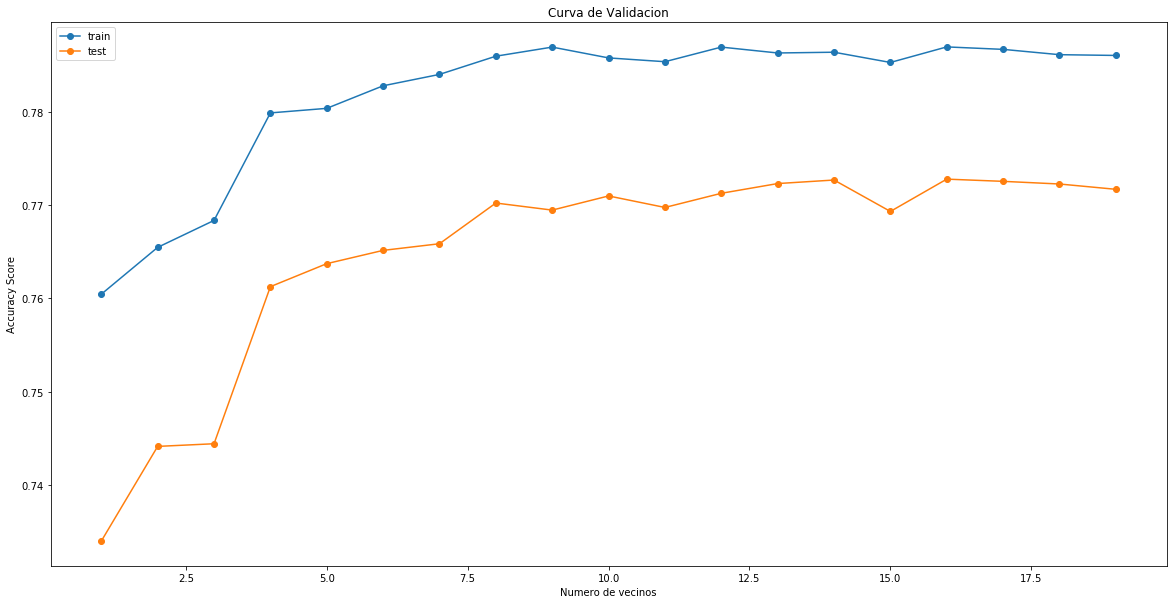

In [367]:
plt.figure(figsize = (20,10))
plt.plot(k_vecinos, lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos, lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel("Numero de vecinos")
plt.ylabel("Accuracy Score")
plt.title("Curva de Validacion")
plt.show()

#### A partir del gráfico los valores optimos a elegir son entre 8 y 12, donde el modelo no se vuelve muy complejo y la diferencia entre train y test no es muy grande. Tomo como valor optimo 10.

#### Hago lo mismo para el Arbol de Decisión:

In [368]:
lista_accuracy_train = []
lista_accuracy_test = []

n_profundidad = list(range(1,20))

for n in n_profundidad:
    clf = DecisionTreeClassifier(max_depth=n, random_state=42)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    
    y_test_pred = clf.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    
    lista_accuracy_train.append(accuracy_train)
    lista_accuracy_test.append(accuracy_test)

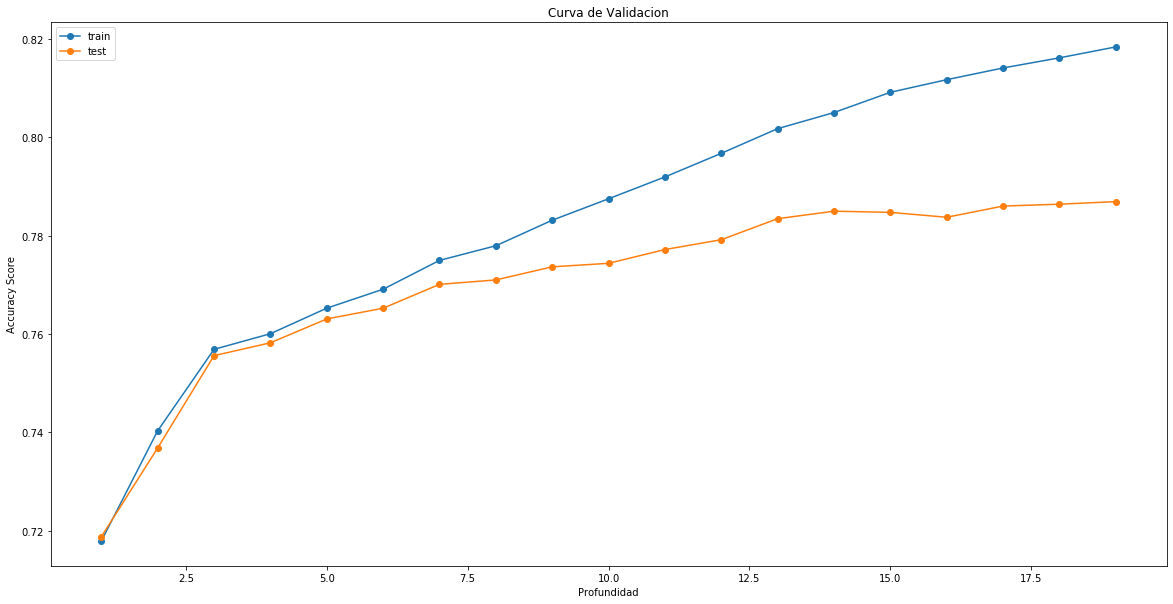

In [369]:
plt.figure(figsize = (20,10))
plt.plot(n_profundidad, lista_accuracy_train,'o-',label='train' )
plt.plot(n_profundidad, lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel("Profundidad")
plt.ylabel("Accuracy Score")
plt.title("Curva de Validacion")
plt.show()

#### A partir del gráfico los valores optimos a elegir son entre 5 y 8, donde el modelo no se vuelve muy complejo y la diferencia entre train y test no es muy grande. Tomo como valor óptimo  8.

#### Vuelvo a comparar los accuracy score de ambos modelos optimizados:

In [370]:
clf_tree = DecisionTreeClassifier(max_depth = 8, random_state=42)
clf_knn = KNeighborsClassifier(n_neighbors = 10)

clf_tree.fit(X_train, y_train)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [371]:
nombres = ['Árbol de Decisión', 'Vecinos más cercanos']
modelos = [clf_tree, clf_knn]
for i, model in enumerate(modelos):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print("Modelo " + nombres[i] + ":")
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print("Accuracy en train: " + str(accuracy_train))
    print("Accuracy en test: " + str(accuracy_test))

Modelo Árbol de Decisión:
Accuracy en train: 0.7779520501904549
Accuracy en test: 0.7710076045627376
Modelo Vecinos más cercanos:
Accuracy en train: 0.785835047766484
Accuracy en test: 0.7710076045627376


#### Por lo visto el que mejor desempeño tiene es el KNeighborsClassifier, lo utilizaré para predecir los valores faltantes de `bathrooms`.

In [372]:
null_bathrooms = null_bathrooms.drop(columns = ['surface_total', 'surface_covered', 'bathrooms','l3','property_type', 'title', 'description'])
pred_bathrooms = clf_knn.predict(null_bathrooms)

#### Agrego la predicción al dataset:

In [373]:
data_f.loc[data_f['bathrooms'].isna(), 'bathrooms'] = pred_bathrooms

In [374]:
despues = data_f.bathrooms

In [375]:
print("Distribución de valores en la categoría bathrooms sin aplicar el modelo")
print(antes.value_counts())
print("Distribución de valores en la categoría bathrooms despues de aplicar el modelo")
print(despues.value_counts())

Distribución de valores en la categoría bathrooms sin aplicar el modelo
1.0    47663
2.0    18179
3.0     3677
4.0      597
5.0       17
Name: bathrooms, dtype: int64
Distribución de valores en la categoría bathrooms despues de aplicar el modelo
1.0    53842
2.0    20512
3.0     4342
4.0      755
5.0       26
Name: bathrooms, dtype: int64


In [376]:
data_f.shape

(79477, 10)

In [377]:
print("Los valores faltantes en cada columna son: ")
print("---------------------------------------------------------------------------")
print(data_f.isna().sum())
print("---------------------------------------------------------------------------")

Los valores faltantes en cada columna son: 
---------------------------------------------------------------------------
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total      8154
surface_covered    8460
price                 0
title                 0
description           0
property_type         0
dtype: int64
---------------------------------------------------------------------------


#### Para los valores faltantes de `surface_total` y `surface_covered` voy a descartar las instancias con valores faltantes en ambas ya que son mis variables que mejor predicen el precio y no quisiera agregarle ruido  al dataset al hacer una predicción erronea.

In [378]:
data_f[(data_f.surface_total.isna()) & (data_f.surface_covered.isna())]

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
4446,Floresta,3.0,2.0,2.0,NaN,NaN,180000.0,VENTA 3 AMB. SEMIPISO CON COCHERA FLORESTA,"SEMIPISO AL FRENTE DE 3 AMBIENTES CON BALCON, ...",Departamento
9185,Pompeya,3.0,2.0,2.0,NaN,NaN,126000.0,"Departamento en Venta en Parque patricios, Cap...",Venta de Departamento 3 AMBIENTES en Parque Pa...,Departamento
10278,Caballito,1.0,0.0,1.0,NaN,NaN,109000.0,"MONOAMBIENTE C/ BALCON, TODOS LOS AMENITIES, B...",Venta de Departamento MONOAMBIENTE en Caballit...,Departamento
10280,Villa Ortuzar,1.0,0.0,1.0,NaN,NaN,100000.0,"Departamento en Venta en Villa urquiza, Capita...",MONOAMBIENTE A ESTRENAR AL FRENTE EN PRIMER PI...,Departamento
10281,Villa Ortuzar,1.0,0.0,1.0,NaN,NaN,110000.0,"Departamento en Venta en Villa urquiza, Capita...",MONOAMBIENTE AL CONTRAFRENTE EN SEGUNDO PISO E...,Departamento
...,...,...,...,...,...,...,...,...,...,...
86515,Parque Patricios,3.0,2.0,1.0,NaN,NaN,82000.0,Venta PH 3 amb,PH 3 amb. A refaccionar. Amplio living comedor...,PH
87692,Colegiales,3.0,2.0,1.0,NaN,NaN,150000.0,PH EN VENTA,Xintel (EDP-EDP-652) Venta y Alquiler de Depar...,PH
97865,Floresta,2.0,1.0,1.0,NaN,NaN,82000.0,2 AMBIENTES CON PATIO,"DEPARTAMENTO TIPO CASA CONTRAFRENTE, DORMITORI...",PH
102170,Parque Avellaneda,4.0,3.0,1.0,NaN,NaN,145000.0,4 AMBIENTES CON PATIO y TERRAZA,TIPO CASA 3 DORMITORIOS (4X4 / 3.50X3.80 / 4X4...,PH


In [379]:
data_f = data_f[(data_f.surface_total.notna()) | (data_f.surface_covered.notna())]

In [380]:
data_f

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
11,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,Venta Departamento en Boedo Capital Federal Ga...,"Departamento en Venta, 2 ambientes espectacula...",Departamento
12,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento dos ambientes tipo duplex - Venta...,"Amplio dos ambientes en duplex, 7 años de anti...",Departamento
20,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento de 2 ambientes en Venta en Abasto,"Lindo monoambiente duplex, 31 m2, living-comed...",Departamento
22,Flores,2.0,1.0,1.0,45.0,45.0,95000.0,Listo para mudarte- Excelente 2 ambientes ampl...,Inmejorable ubicación a tan solo 2 cuadras del...,Departamento
23,Flores,2.0,1.0,1.0,45.0,45.0,95000.0,Venta. Departamento 2 ambientes. Baulera. Exce...,CARACTERÍSTICAS- Ambientes: 2- Superficie Tota...,Departamento
...,...,...,...,...,...,...,...,...,...,...
146178,Palermo,3.0,2.0,3.0,154.0,154.0,385000.0,PH en planta baja con entrada independiente,Excelente y super luminoso PH con acceso indep...,PH
146440,Palermo,2.0,1.0,1.0,40.0,40.0,130000.0,CERCA DE NICETO VEGA -LINDO PH,Lindisimo indo ph al frente reciclado Living c...,PH
146441,Palermo,2.0,1.0,1.0,40.0,40.0,130000.0,Hermoso PH - Reciclado - Palermo Holywood,Hermoso PH ubicado en Palermo Holywood Complet...,PH
146549,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,Hermoso PH de 3 ambientes al frente muy lumisoso,Hermoso PH ubicado en el primer piso.al frente...,PH


In [381]:
print("Los valores faltantes en cada columna son: ")
print("---------------------------------------------------------------------------")
print(data_f.isna().sum())
print("---------------------------------------------------------------------------")

Los valores faltantes en cada columna son: 
---------------------------------------------------------------------------
l3                   0
rooms                0
bedrooms             0
bathrooms            0
surface_total      146
surface_covered    452
price                0
title                0
description          0
property_type        0
dtype: int64
---------------------------------------------------------------------------


#### Ahora mi dataset tiene 452 instancias con valores faltantes en `surface_covered` pero no en `surface_total` y 146 instancias con valores faltantes en `surface_total` pero no en `surface_covered`.

#### Como dichas variables tienen una alta correlación y no encuentro un método para determinar el valor de una en función de la otra voy a imputar utilizando el mismo valor de la otra variable.

In [382]:
data_f.loc[data_f['surface_total'].isna(), 'surface_total'] = data.surface_covered

In [383]:
data_f.loc[data_f['surface_covered'].isna(), 'surface_covered'] = data.surface_total

In [384]:
print("Los valores faltantes en cada columna son: ")
print("---------------------------------------------------------------------------")
print(data_f.isna().sum())
print("---------------------------------------------------------------------------")

Los valores faltantes en cada columna son: 
---------------------------------------------------------------------------
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
title              0
description        0
property_type      0
dtype: int64
---------------------------------------------------------------------------


In [385]:
data_f.shape

(71469, 10)

#### De este modo finalizo la imputación de valores faltantes. Obteniendo un dataset con 71469 instancias.

In [386]:
data_f.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
11,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,Venta Departamento en Boedo Capital Federal Ga...,"Departamento en Venta, 2 ambientes espectacula...",Departamento
12,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento dos ambientes tipo duplex - Venta...,"Amplio dos ambientes en duplex, 7 años de anti...",Departamento
20,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento de 2 ambientes en Venta en Abasto,"Lindo monoambiente duplex, 31 m2, living-comed...",Departamento
22,Flores,2.0,1.0,1.0,45.0,45.0,95000.0,Listo para mudarte- Excelente 2 ambientes ampl...,Inmejorable ubicación a tan solo 2 cuadras del...,Departamento
23,Flores,2.0,1.0,1.0,45.0,45.0,95000.0,Venta. Departamento 2 ambientes. Baulera. Exce...,CARACTERÍSTICAS- Ambientes: 2- Superficie Tota...,Departamento


### **Encoding**

#### Generaré variables dummies para las variables `l3` y `property_type` ya que al momento de tasar una propiedad la ubicación y el tipo de propiedad son variables que afectan el precio y desearia que mis modelos de ML puedan utilizar estas variables categóricas.

In [387]:
data = data_f
dummy_tipos = pd.get_dummies(data["property_type"])
dummy_l3 = pd.get_dummies(data["l3"])
data = pd.concat([data, dummy_tipos, dummy_l3], axis = 1)
print(data.shape)
data.head()

(71469, 70)


,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
11,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,Venta Departamento en Boedo Capital Federal Ga...,"Departamento en Venta, 2 ambientes espectacula...",Departamento,...,0,0,0,0,0,0,0,0,0,0
12,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento dos ambientes tipo duplex - Venta...,"Amplio dos ambientes en duplex, 7 años de anti...",Departamento,...,0,0,0,0,0,0,0,0,0,0
20,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento de 2 ambientes en Venta en Abasto,"Lindo monoambiente duplex, 31 m2, living-comed...",Departamento,...,0,0,0,0,0,0,0,0,0,0
22,Flores,2.0,1.0,1.0,45.0,45.0,95000.0,Listo para mudarte- Excelente 2 ambientes ampl...,Inmejorable ubicación a tan solo 2 cuadras del...,Departamento,...,0,0,0,0,0,0,0,0,0,0
23,Flores,2.0,1.0,1.0,45.0,45.0,95000.0,Venta. Departamento 2 ambientes. Baulera. Exce...,CARACTERÍSTICAS- Ambientes: 2- Superficie Tota...,Departamento,...,0,0,0,0,0,0,0,0,0,0


### **Escalado de Datos**

#### Las variables `bathrooms`, `bedrooms` y `rooms` tienen las mismas unidades, valores enteros pequeños, mientras que las variables `surface_total` y `surface_covered` están dadas en $m^2$. Por lo que es buena idea hacer una estandarización de los datos para que esta diferencia en unidades no afecte al modelo.

#### Para decidir el método de escalado de datos voy a analizar la distribución de cada variable.

#### Comienzo por analizar la distribución de las variables `bathrooms` `bedrooms` y `rooms`:

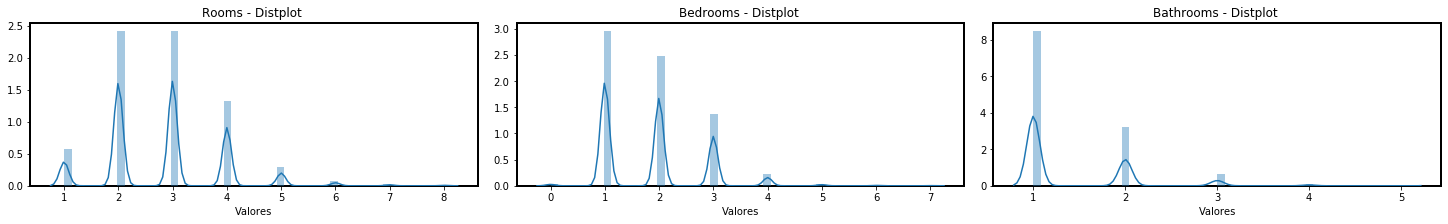

In [388]:
fig, axes = plt.subplots(1, 3, figsize=(20,3), constrained_layout=True)
ax1, ax2, ax3 = axes.flatten()
   
ax1.patch.set_edgecolor('black') 
ax1.patch.set_linewidth('2')  

ax2.patch.set_edgecolor('black') 
ax2.patch.set_linewidth('2')  

ax3.patch.set_edgecolor('black') 
ax3.patch.set_linewidth('2')

datasets = [data.rooms, data.bedrooms, data.bathrooms]
nombres = ["Rooms", "Bedrooms", "Bathrooms"]
for i, ax_ in enumerate([ax1, ax2, ax3]):
        g1 = sns.distplot(datasets[i], ax = ax_)
        g1.set(xlabel="Valores", ylabel="", title=str(nombres[i]) + " - Distplot ")

#### Como estas variables no siguen una distribución de potencias usaré una estandarización por Z-Score.

In [389]:
scaler_df = data.copy()

columns_to_scale  = ['rooms', 'bedrooms','bathrooms']

scaler = StandardScaler()

scaled = scaler.fit_transform(scaler_df[columns_to_scale])

columns_left = scaler_df.copy()
columns_left = columns_left.drop(columns = columns_to_scale)

resulted_values = pd.DataFrame(scaled, index=scaler_df.index, columns=scaler_df[columns_to_scale].columns)

frames = [resulted_values,columns_left]

data_scaled = pd.concat(frames,axis=1)

data_scaled.head()

,rooms,bedrooms,bathrooms,l3,surface_total,surface_covered,price,title,description,property_type,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
11,-0.763254,-0.943578,-0.617868,Boedo,68.0,59.0,149000.0,Venta Departamento en Boedo Capital Federal Ga...,"Departamento en Venta, 2 ambientes espectacula...",Departamento,...,0,0,0,0,0,0,0,0,0,0
12,-0.763254,-0.943578,-0.617868,Boedo,50.0,44.0,115000.0,Departamento dos ambientes tipo duplex - Venta...,"Amplio dos ambientes en duplex, 7 años de anti...",Departamento,...,0,0,0,0,0,0,0,0,0,0
20,-0.763254,-0.943578,-0.617868,Abasto,31.0,31.0,75000.0,Departamento de 2 ambientes en Venta en Abasto,"Lindo monoambiente duplex, 31 m2, living-comed...",Departamento,...,0,0,0,0,0,0,0,0,0,0
22,-0.763254,-0.943578,-0.617868,Flores,45.0,45.0,95000.0,Listo para mudarte- Excelente 2 ambientes ampl...,Inmejorable ubicación a tan solo 2 cuadras del...,Departamento,...,0,0,0,0,0,0,0,0,0,0
23,-0.763254,-0.943578,-0.617868,Flores,45.0,45.0,95000.0,Venta. Departamento 2 ambientes. Baulera. Exce...,CARACTERÍSTICAS- Ambientes: 2- Superficie Tota...,Departamento,...,0,0,0,0,0,0,0,0,0,0


#### Ahora analizo la distribución de las variables `surface_total`, `surface_covered` y `price`.

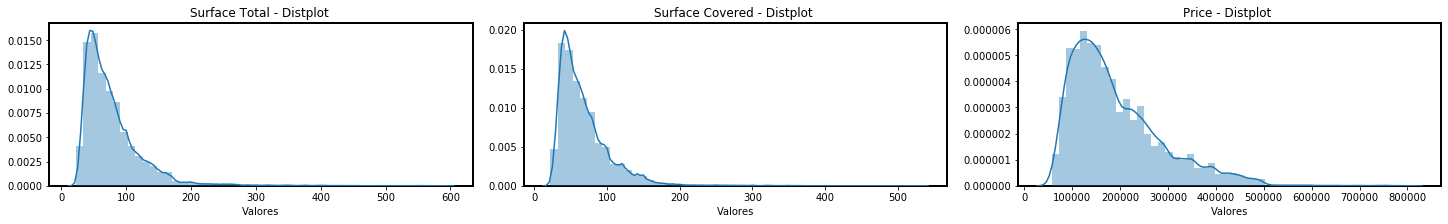

In [390]:
fig, axes = plt.subplots(1, 3, figsize=(20,3), constrained_layout=True)
ax1, ax2, ax3 = axes.flatten()
   
ax1.patch.set_edgecolor('black') 
ax1.patch.set_linewidth('2')  

ax2.patch.set_edgecolor('black') 
ax2.patch.set_linewidth('2')  

ax3.patch.set_edgecolor('black') 
ax3.patch.set_linewidth('2')

datasets = [data.surface_total, data.surface_covered, data.price]
nombres = ["Surface Total", "Surface Covered", "Price"]
for i, ax_ in enumerate([ax1, ax2, ax3]):
        g1 = sns.distplot(datasets[i], ax = ax_)
        g1.set(xlabel="Valores", ylabel="", title=str(nombres[i]) + " - Distplot ")

#### Aquí se observa que las variables siguen una ley de potencias, por lo que primero las voy a escalar tomando logaritmo, si el resultado es muy drástico voy a escalar tomando raíz cuadrada. Como la variable de interés es `price` para recueperarla luego solo debo hacer $e^{price}$ para recuperar el valor original.

In [391]:
data_scaled['surface_total'] = np.log(data_scaled['surface_total'])
data_scaled['surface_covered'] = np.log(data_scaled['surface_covered'])
data_scaled['price'] = np.log(data_scaled['price'])

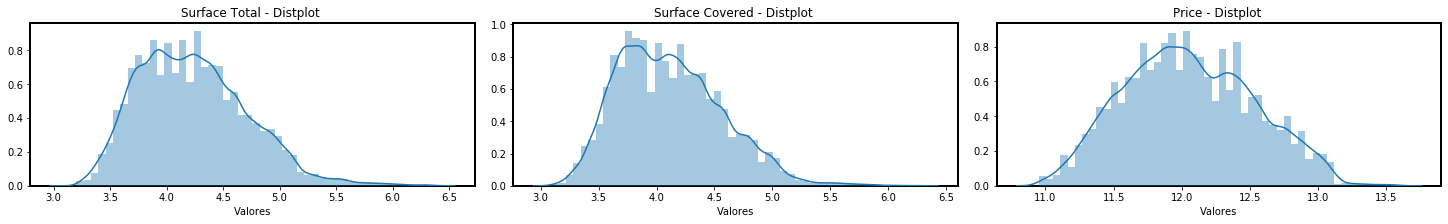

In [392]:
fig, axes = plt.subplots(1, 3, figsize=(20,3), constrained_layout=True)
ax1, ax2, ax3 = axes.flatten()
   
ax1.patch.set_edgecolor('black') 
ax1.patch.set_linewidth('2')  

ax2.patch.set_edgecolor('black') 
ax2.patch.set_linewidth('2')  

ax3.patch.set_edgecolor('black') 
ax3.patch.set_linewidth('2')

datasets = [data_scaled.surface_total, data_scaled.surface_covered, data_scaled.price]
nombres = ["Surface Total", "Surface Covered", "Price"]
for i, ax_ in enumerate([ax1, ax2, ax3]):
        g1 = sns.distplot(datasets[i], ax = ax_)
        g1.set(xlabel="Valores", ylabel="", title=str(nombres[i]) + " - Distplot ")

#### Conforme con la transformación de los datos. Voy a aplicarle el StandardScaler a `surface_total`, `surface_covered` y `price`. Lo haré manualmente para price así conociendo el valor medio y la desviación estandar poder recuperar la escala original en USD aplicando la transformación:
#### $$e^{\alpha price + M}$$ 
#### donde $\alpha =$ Desvío Estándar y $M = $ Valor medio.

In [393]:
scaler_df = data_scaled.copy()

columns_to_scale  = ['surface_total', 'surface_covered']

scaler = StandardScaler()

scaled = scaler.fit_transform(scaler_df[columns_to_scale])

columns_left = scaler_df.copy()
columns_left = columns_left.drop(columns = columns_to_scale)

resulted_values = pd.DataFrame(scaled, index=scaler_df.index, columns=scaler_df[columns_to_scale].columns)

frames = [resulted_values,columns_left]

data_scaled = pd.concat(frames,axis=1)

data_scaled.head()

,surface_total,surface_covered,rooms,bedrooms,bathrooms,l3,price,title,description,property_type,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
11,-0.032178,-0.086134,-0.763254,-0.943578,-0.617868,Boedo,11.911702,Venta Departamento en Boedo Capital Federal Ga...,"Departamento en Venta, 2 ambientes espectacula...",Departamento,...,0,0,0,0,0,0,0,0,0,0
12,-0.670131,-0.739261,-0.763254,-0.943578,-0.617868,Boedo,11.652687,Departamento dos ambientes tipo duplex - Venta...,"Amplio dos ambientes en duplex, 7 años de anti...",Departamento,...,0,0,0,0,0,0,0,0,0,0
20,-1.661933,-1.518972,-0.763254,-0.943578,-0.617868,Abasto,11.225243,Departamento de 2 ambientes en Venta en Abasto,"Lindo monoambiente duplex, 31 m2, living-comed...",Departamento,...,0,0,0,0,0,0,0,0,0,0
22,-0.888727,-0.689226,-0.763254,-0.943578,-0.617868,Flores,11.461632,Listo para mudarte- Excelente 2 ambientes ampl...,Inmejorable ubicación a tan solo 2 cuadras del...,Departamento,...,0,0,0,0,0,0,0,0,0,0
23,-0.888727,-0.689226,-0.763254,-0.943578,-0.617868,Flores,11.461632,Venta. Departamento 2 ambientes. Baulera. Exce...,CARACTERÍSTICAS- Ambientes: 2- Superficie Tota...,Departamento,...,0,0,0,0,0,0,0,0,0,0


In [394]:
price = data_scaled.price
mean_p = price.mean()
std_p = price.std()
precio_transf = [mean_p, std_p] #Esta lista la voy a usar luego para hacer mi transformacion.

data_scaled.price = (data_scaled.price - mean_p)/std_p

data_scaled.head()

,surface_total,surface_covered,rooms,bedrooms,bathrooms,l3,price,title,description,property_type,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
11,-0.032178,-0.086134,-0.763254,-0.943578,-0.617868,Boedo,-0.302468,Venta Departamento en Boedo Capital Federal Ga...,"Departamento en Venta, 2 ambientes espectacula...",Departamento,...,0,0,0,0,0,0,0,0,0,0
12,-0.670131,-0.739261,-0.763254,-0.943578,-0.617868,Boedo,-0.850621,Departamento dos ambientes tipo duplex - Venta...,"Amplio dos ambientes en duplex, 7 años de anti...",Departamento,...,0,0,0,0,0,0,0,0,0,0
20,-1.661933,-1.518972,-0.763254,-0.943578,-0.617868,Abasto,-1.755222,Departamento de 2 ambientes en Venta en Abasto,"Lindo monoambiente duplex, 31 m2, living-comed...",Departamento,...,0,0,0,0,0,0,0,0,0,0
22,-0.888727,-0.689226,-0.763254,-0.943578,-0.617868,Flores,-1.254952,Listo para mudarte- Excelente 2 ambientes ampl...,Inmejorable ubicación a tan solo 2 cuadras del...,Departamento,...,0,0,0,0,0,0,0,0,0,0
23,-0.888727,-0.689226,-0.763254,-0.943578,-0.617868,Flores,-1.254952,Venta. Departamento 2 ambientes. Baulera. Exce...,CARACTERÍSTICAS- Ambientes: 2- Superficie Tota...,Departamento,...,0,0,0,0,0,0,0,0,0,0


#### Veo nuevamente las distribuciones resultantes:

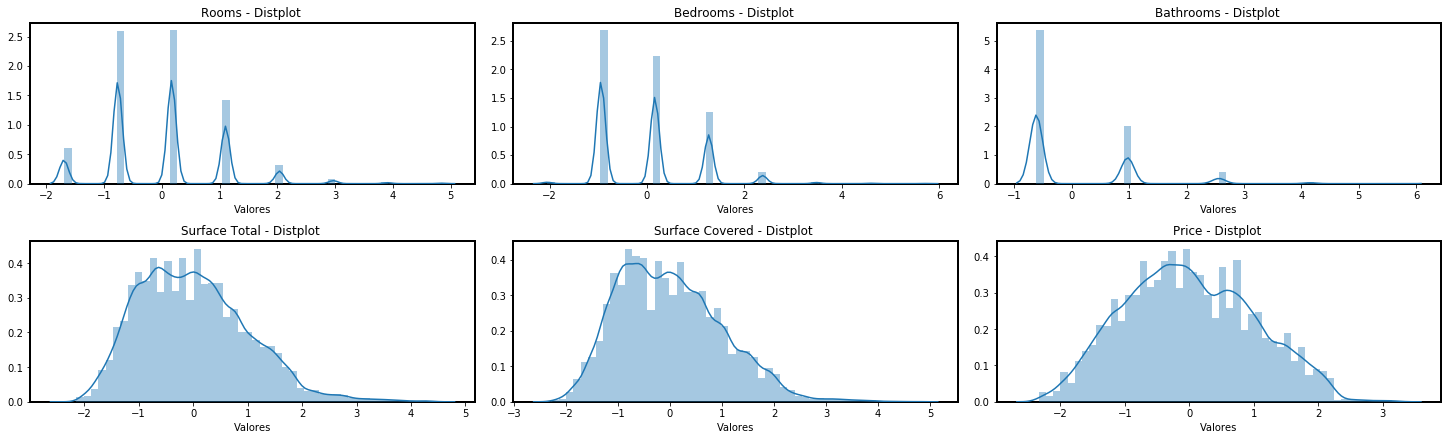

In [395]:
fig, axes = plt.subplots(2, 3, figsize=(20,6), constrained_layout=True)
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()
   
ax1.patch.set_edgecolor('black') 
ax1.patch.set_linewidth('2')  

ax2.patch.set_edgecolor('black') 
ax2.patch.set_linewidth('2')  

ax3.patch.set_edgecolor('black') 
ax3.patch.set_linewidth('2')  

ax4.patch.set_edgecolor('black') 
ax4.patch.set_linewidth('2')  

ax5.patch.set_edgecolor('black') 
ax5.patch.set_linewidth('2')  

ax6.patch.set_edgecolor('black') 
ax6.patch.set_linewidth('2') 

datasets = [data_scaled.rooms, data_scaled.bedrooms, data_scaled.bathrooms, data_scaled.surface_total, data_scaled.surface_covered, data_scaled.price]
nombres = ["Rooms", "Bedrooms", "Bathrooms", "Surface Total", "Surface Covered", "Price"]
for i, ax_ in enumerate([ax1, ax2, ax3, ax4, ax5, ax6]):
        g1 = sns.distplot(datasets[i], ax = ax_)
        g1.set(xlabel="Valores", ylabel="", title=str(nombres[i]) + " - Distplot ")

#### Ahora que finalicé mi preprocesamiento de datos voy a hacer un pairplot y ver los estadísticos del dataset para ver mi resultado.

<Figure size 864x864 with 0 Axes>

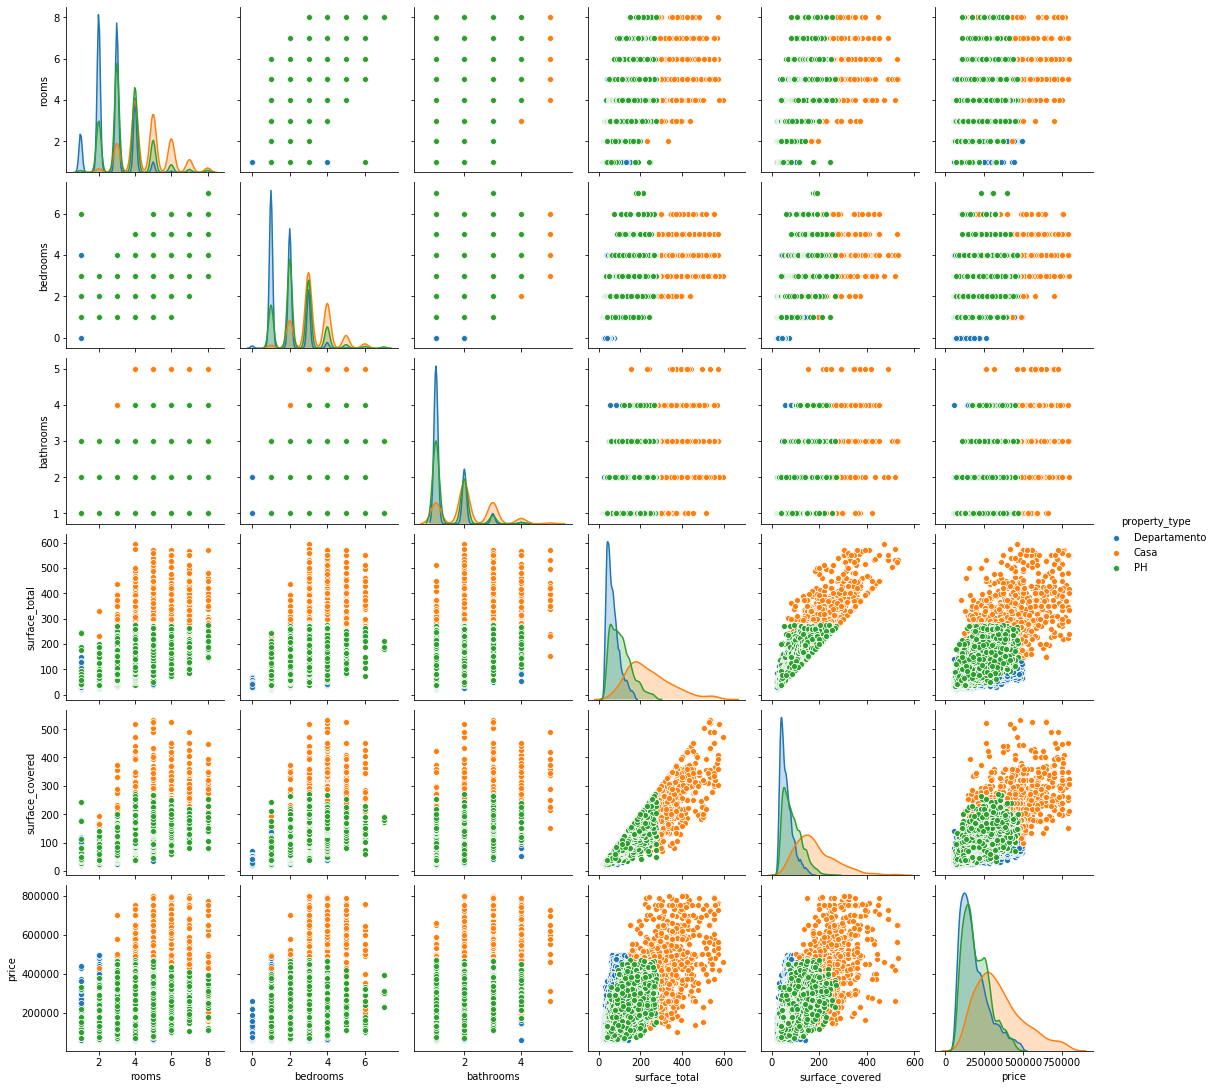

In [396]:
pairplot_columns  = ['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price', 'property_type']
pairplot_df = data[pairplot_columns]

plt.figure(figsize=(12,12))
sns.pairplot(pairplot_df, hue="property_type")
plt.show()

<Figure size 864x864 with 0 Axes>

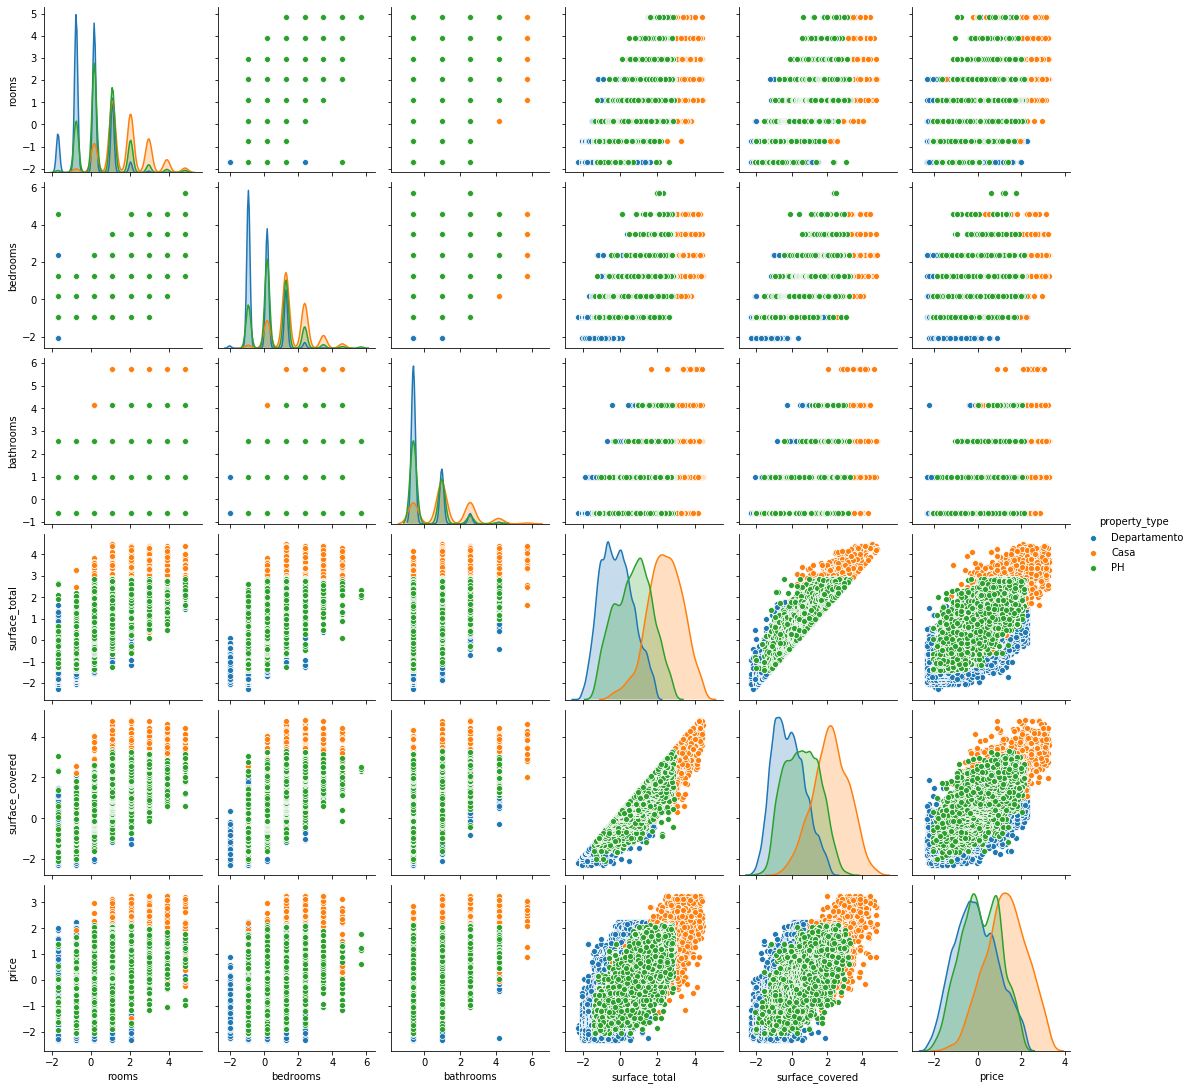

In [397]:
pairplot_columns  = ['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price', 'property_type']
pairplot_df = data_scaled[pairplot_columns]

plt.figure(figsize=(12,12))
sns.pairplot(pairplot_df, hue="property_type")
plt.show()

#### Veo como es la correlación entre las variables (sin incluir las variables dummies) y luego ver esta misma correlación para cada tipo de propiedad en particular. Lo haré tanto para los datos reescalados como los datos sin escala para ver si hay mejora.

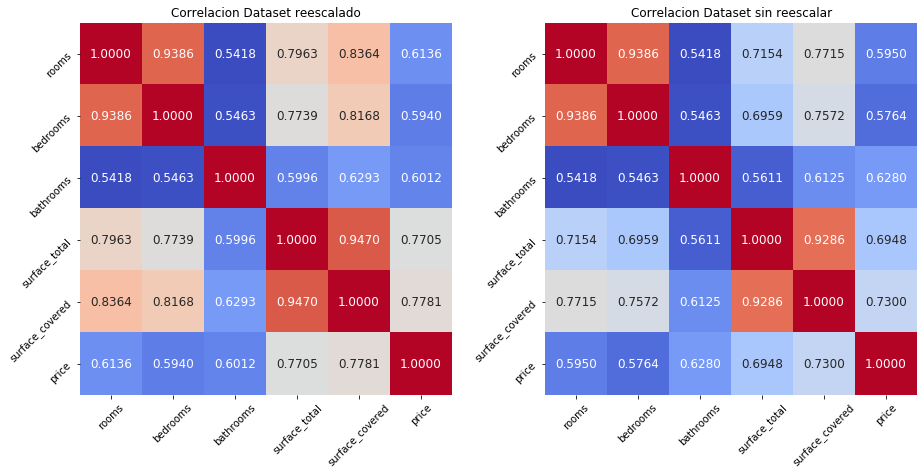

In [398]:
df_reesc_numerical = data_scaled[["rooms", "bedrooms", "bathrooms", "surface_total","surface_covered", "price"]]
corr_reesc = df_reesc_numerical.corr()
df_numerical = data[["rooms", "bedrooms", "bathrooms", "surface_total","surface_covered", "price"]]
corr = df_numerical.corr()

plt.figure(figsize=(15,150))
plt.subplots_adjust(wspace=0.25)

plt.subplot(1,2,1)
sns.heatmap(corr_reesc, cbar = False,  square = True, annot=True, fmt= '.4f',annot_kws={'size': 12},
           xticklabels= df_reesc_numerical.columns, 
           yticklabels= df_reesc_numerical.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Correlacion Dataset reescalado")

plt.subplot(1,2,2)
sns.heatmap(corr, cbar = False,  square = True, annot=True, fmt= '.4f',annot_kws={'size': 12},
           xticklabels= df_numerical.columns, 
           yticklabels= df_numerical.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Correlacion Dataset sin reescalar")
plt.show()

#### A partir del gráfico se observa que las variables que mejor correlación tienen con `price` son `surface_total` y `surface_covered`. Por lo tanto, estas dos son las que mejor predicen el precio. A su vez, se observa que el dataset reescalado tiene una mejor correlación en dichas variables.

In [399]:
# Columnas que me interesan
columnas = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']

In [400]:
print("Estadisticos Dataset sin escalar:")
pd.set_option('display.expand_frame_repr', False)
print(data[columnas].describe())
print("-------------------------------------------------------------------------------------")
print("Estadisticos Dataset Escalado:")
print(data_scaled[columnas].describe())

Estadisticos Dataset sin escalar:
              rooms      bedrooms     bathrooms  surface_total  surface_covered          price
count  71469.000000  71469.000000  71469.000000   71469.000000     71469.000000   71469.000000
mean       2.818621      1.853433      1.388476      78.526872        68.458129  192541.310009
std        1.072547      0.904471      0.628741      47.685305        37.350239   96414.295655
min        1.000000      0.000000      1.000000      23.000000        22.000000   57000.000000
25%        2.000000      1.000000      1.000000      48.000000        43.000000  120000.000000
50%        3.000000      2.000000      1.000000      66.000000        59.000000  168000.000000
75%        3.000000      2.000000      2.000000      94.000000        82.000000  240000.000000
max        8.000000      7.000000      5.000000     593.000000       532.000000  800000.000000
-------------------------------------------------------------------------------------
Estadisticos Dataset Esca

In [401]:
data = data.drop(columns = ["l3", "property_type"])
data_scaled = data_scaled.drop(columns = ["l3", "property_type"])

#### Ahora veo como es el desempeño de mi modelo entrenado en el Proyecto 01 usando este nuevo dataset. Primero veo con los datos sin reescalar y después con los datos reescalados.

#### En el Proyecto 01 entrené 3 modelos de ML, con los cuales obtuve los siguientes resultados:
   - Regresión Lineal: RMSE en Train: 45588. RMSE en Test: 45175.
   - Árbol de decisión (Optimizado): RMSE en Train: 25103. RMSE en Test: 39110.
   - Vecinos más cercanos (Optimizado): RMSE en Train: 29726. RMSE en Test: 41928. 

In [402]:
X = data.drop(columns = ["price", "title", "description"])
y = data[["price"]]

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50028, 65) (50028, 1) (21441, 65) (21441, 1)


In [404]:
linear_regressor = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=21, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=3)

In [405]:
linear_regressor.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 48272.328564139636
Raíz del error cuadrático medio en Test: 48916.37582291589


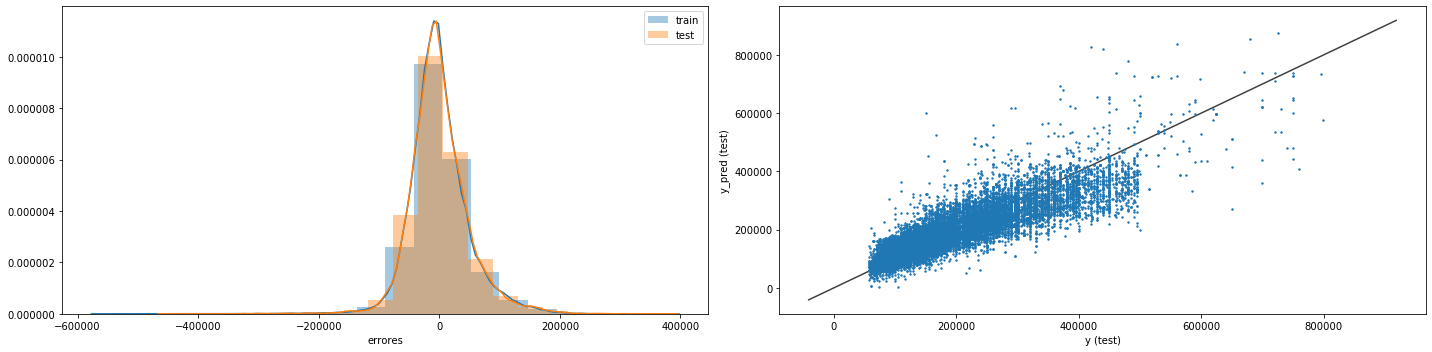

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 26937.604868833118
Raíz del error cuadrático medio en Test: 42013.1632680082


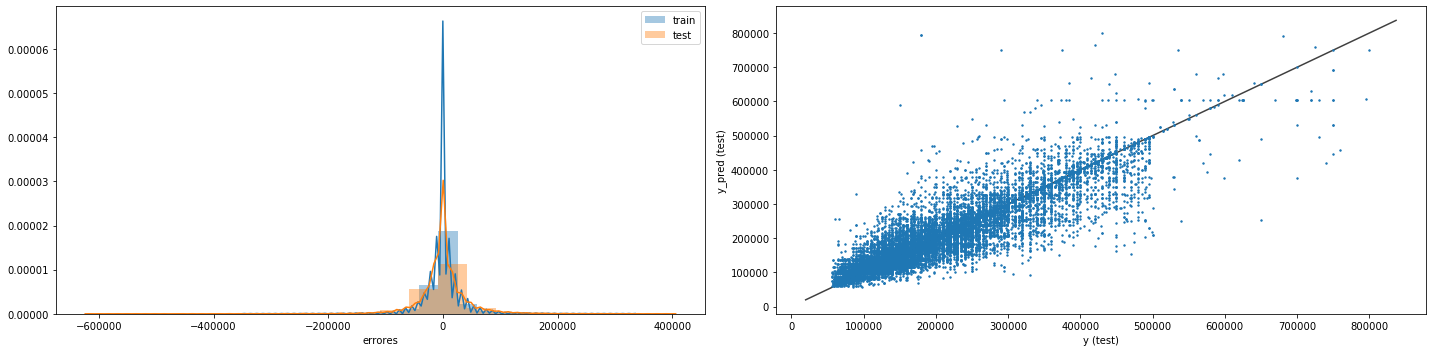

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 31993.207024278036
Raíz del error cuadrático medio en Test: 45833.10390406754


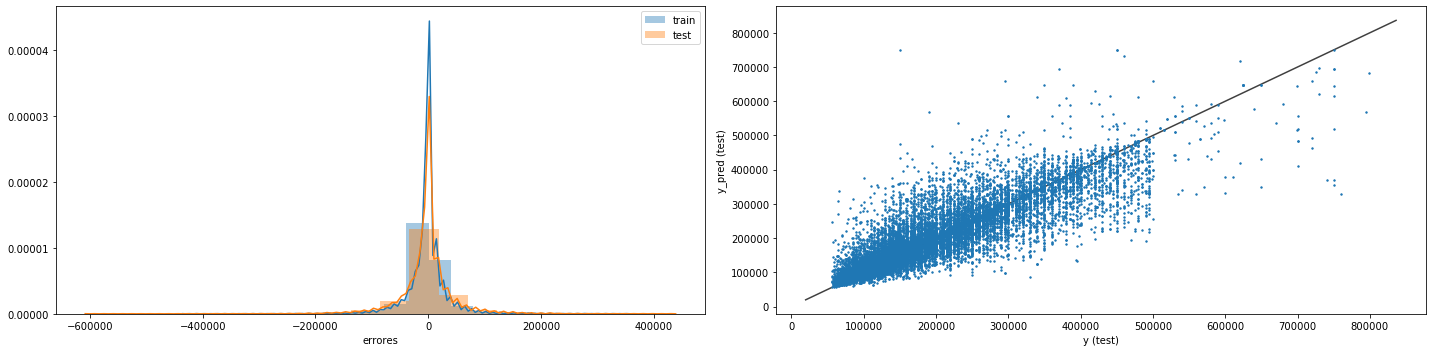

In [406]:
from sklearn.metrics import mean_squared_error
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_regressor, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train).reshape(-1,1)
    y_test_pred = model.predict(X_test).reshape(-1,1)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (20,5))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [407]:
X = data_scaled.drop(columns = ["price", "title", "description"])
y = data_scaled[["price"]]

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50028, 65) (50028, 1) (21441, 65) (21441, 1)


In [409]:
linear_regressor = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=21, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=3)

In [410]:
linear_regressor.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [411]:
def reesc(x):
    return np.exp(x*precio_transf[1] + precio_transf[0])

#### Gráficos de la evaluación de los modelos sin reescalar `y_train`, `y_test`, `y_train_pred` e `y_test_pred`

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 0.439057629772778
Raíz del error cuadrático medio en Test: 0.44090123901670597


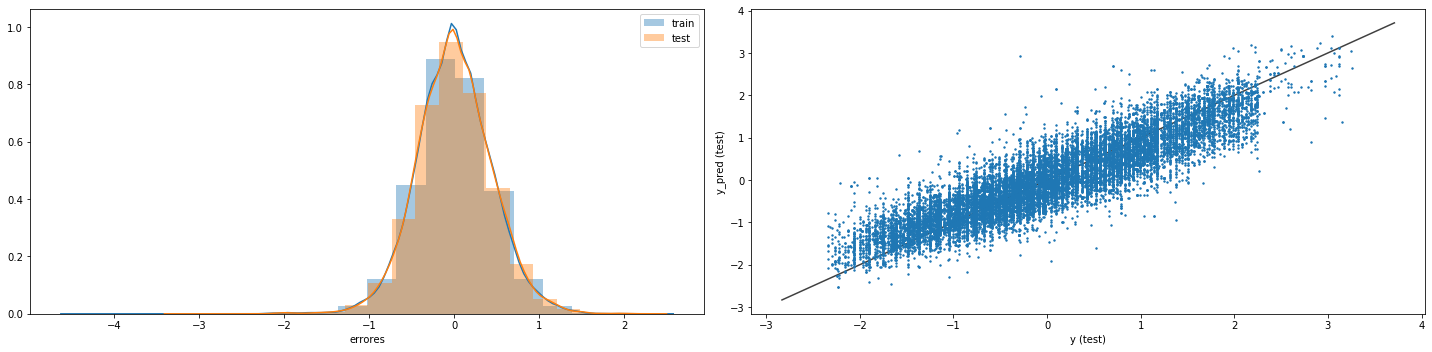

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 0.3151721992604221
Raíz del error cuadrático medio en Test: 0.41649290674569445


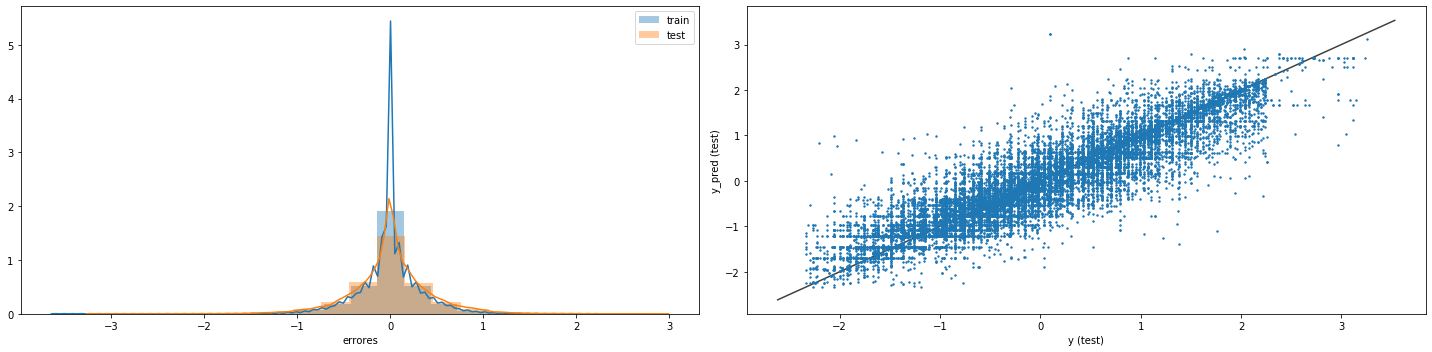

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 0.2817528209410839
Raíz del error cuadrático medio en Test: 0.38374725345331795


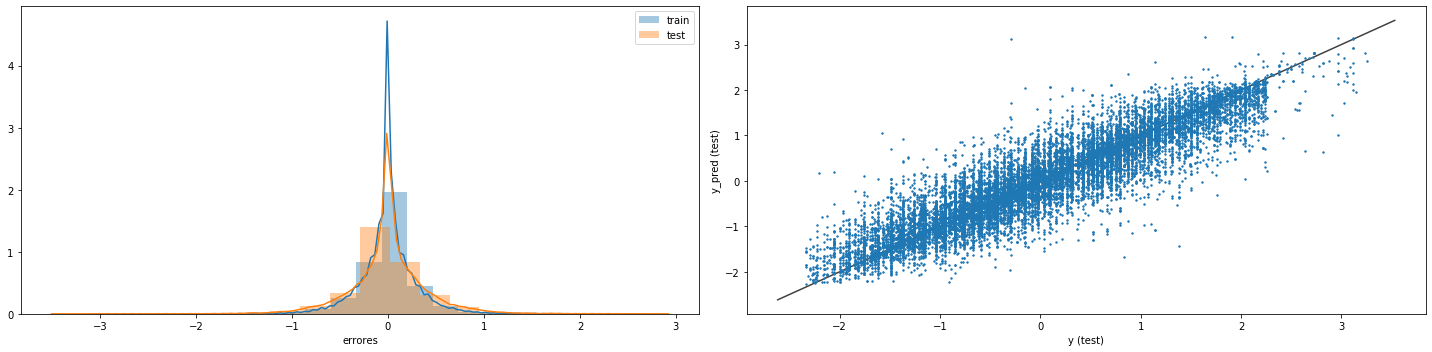

In [412]:
from sklearn.metrics import mean_squared_error
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_regressor, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train).reshape(-1,1)
    y_test_pred = model.predict(X_test).reshape(-1,1)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (20,5))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

#### Gráficos de la evaluación de los modelos reescalando `y_train`, `y_test`, `y_train_pred` e `y_test_pred`

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 44751.746357486074
Raíz del error cuadrático medio en Test: 45880.33115138881


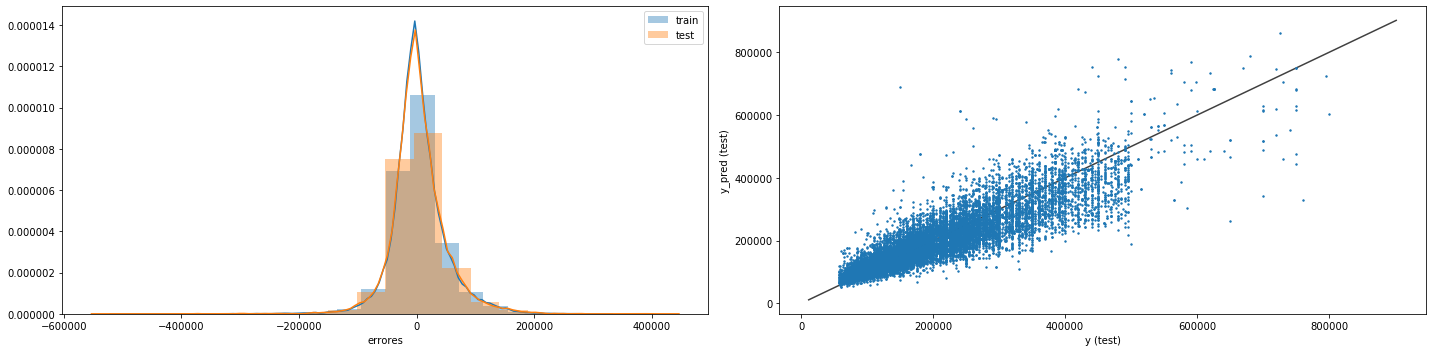

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 28013.497436662496
Raíz del error cuadrático medio en Test: 42464.30581975056


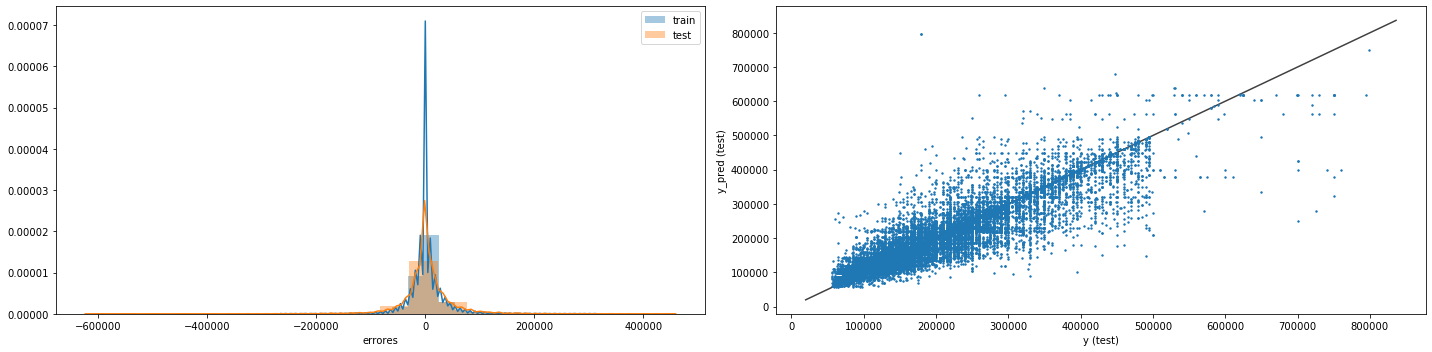

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 27966.991168134275
Raíz del error cuadrático medio en Test: 39288.43305647134


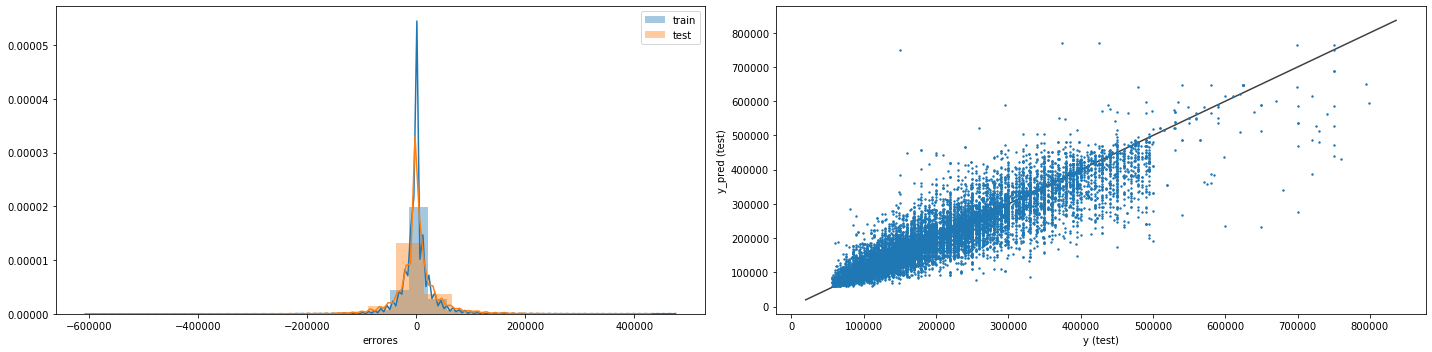

In [413]:
from sklearn.metrics import mean_squared_error
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_regressor, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train).reshape(-1,1)
    y_test_pred = model.predict(X_test).reshape(-1,1)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(reesc(y_train), reesc(y_train_pred)))
    rmse_test = np.sqrt(mean_squared_error(reesc(y_test), reesc(y_test_pred)))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (20,5))

    plt.subplot(1,2,1)
    sns.distplot(reesc(y_train) - reesc(y_train_pred), bins = 20, label = 'train')
    sns.distplot(reesc(y_test) - reesc(y_test_pred), bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    
    ax = plt.subplot(1,2,2)
    ax.scatter(reesc(y_test),reesc(y_test_pred), s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

#### Diferencia entre **Reescalado - No Reescalado - Proyecto 01**: (arriba train y abajo test)

- Regresión lineal: $$44751.746357486074 - 48272.328564139636 - 45588$$ $$45880.33115138881 - 48916.37582291589 - 45175$$
- Árbol de Decision: $$28013.497436662496 - 26937.604868833118 - 25103$$ $$42464.30581975056 - 42013.1632680082 - 39110$$
- KNN: $$27966.991168134275 - 31993.207024278036 - 29726$$ $$39288.43305647134 - 45833.10390406754 - 41928$$

#### Se observa que el dataset reescalado tiene un mejor performance que el no reescalado, esto seguramente se deba a que al incorporar el escalado al preprocesamiento logré que las variables `surface_covered`, `surfacde_total` y `price` sigan distribuciones similares a la normal. De todos módos esta comparación estará sesgada ya que no realicé ninguna optimización de  hiperparámetros para los datos reescalados y no reescalados.

#### Mi objetivo será mejorar estos resultados en la parte B.

## Parte B: Modelos Avanzados

1) Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

2) Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

3) Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

<br/>
<div class="description_style">
<b>Consideraciones:</b>

* Al menos un modelo debe ser optimizado por Grid Search o Random Search; el otro puede ser optimizado por búsqueda manual (es decir, puedes dejar los mejores parámetros que encontraste probando ).
* En la optimización de hiperparámetros, debes justificar los parámetros que elegiste para optimizar y el rango de cada uno.
</div>

In [414]:
df = data_scaled.copy()
df.head()

,surface_total,surface_covered,rooms,bedrooms,bathrooms,price,title,description,Casa,Departamento,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
11,-0.032178,-0.086134,-0.763254,-0.943578,-0.617868,-0.302468,Venta Departamento en Boedo Capital Federal Ga...,"Departamento en Venta, 2 ambientes espectacula...",0,1,...,0,0,0,0,0,0,0,0,0,0
12,-0.670131,-0.739261,-0.763254,-0.943578,-0.617868,-0.850621,Departamento dos ambientes tipo duplex - Venta...,"Amplio dos ambientes en duplex, 7 años de anti...",0,1,...,0,0,0,0,0,0,0,0,0,0
20,-1.661933,-1.518972,-0.763254,-0.943578,-0.617868,-1.755222,Departamento de 2 ambientes en Venta en Abasto,"Lindo monoambiente duplex, 31 m2, living-comed...",0,1,...,0,0,0,0,0,0,0,0,0,0
22,-0.888727,-0.689226,-0.763254,-0.943578,-0.617868,-1.254952,Listo para mudarte- Excelente 2 ambientes ampl...,Inmejorable ubicación a tan solo 2 cuadras del...,0,1,...,0,0,0,0,0,0,0,0,0,0
23,-0.888727,-0.689226,-0.763254,-0.943578,-0.617868,-1.254952,Venta. Departamento 2 ambientes. Baulera. Exce...,CARACTERÍSTICAS- Ambientes: 2- Superficie Tota...,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Defino la siguiente función que voy a utilizar más adelante:

In [415]:
def show_rmse_to_USD_from_model_list(model_names, model_list, _X_train, _X_test,_y_train,_y_test):
    for i, model in enumerate(model_list):
        y_train_pred = model.predict(_X_train)
        y_test_pred = model.predict(_X_test)


        print(f'Modelo: {model_names[i]}')
        rmse_train = np.sqrt(mean_squared_error(reesc(_y_train), reesc(y_train_pred)))
        rmse_test = np.sqrt(mean_squared_error(reesc(_y_test), reesc(y_test_pred)))
        print(f'RMSE en Train: {round(rmse_train,2)}')
        print(f'RMSE en Test: {round(rmse_test,2)}')
        print("------------------------------------------")

#### Ahora carguemos todos los modelos a utilizar:

In [416]:
forest = RandomForestRegressor(n_jobs=-1)
xgb = XGBRegressor()
tree = DecisionTreeRegressor()
ridge = Ridge()

#### Primero quitaré del dataset las columnas `title` y `description` para quedarme solo con las variables numéricas.

In [417]:
df = df.drop(columns = ["title", "description"])
df.head()

,surface_total,surface_covered,rooms,bedrooms,bathrooms,price,Casa,Departamento,PH,Abasto,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
11,-0.032178,-0.086134,-0.763254,-0.943578,-0.617868,-0.302468,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,-0.670131,-0.739261,-0.763254,-0.943578,-0.617868,-0.850621,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20,-1.661933,-1.518972,-0.763254,-0.943578,-0.617868,-1.755222,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
22,-0.888727,-0.689226,-0.763254,-0.943578,-0.617868,-1.254952,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23,-0.888727,-0.689226,-0.763254,-0.943578,-0.617868,-1.254952,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [418]:
X = df.drop(columns = ["price"])
y = df[["price"]]

#### Ahora voy a separar los datos de held-out de los de procesamiento.

In [419]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(57175, 65) (57175, 1) (14294, 65) (14294, 1)


#### Voy a definir la grilla para la optimización de hiperparámetros. Para luego utilizar `RandomizedSearchCV`. Primero lo haré para un `DecissionTreeRegressor`

In [420]:
param_tree = {"criterion": ["mse", "friedman_mse"], # Probare con estas y no con MAE ya que esta no es sensible a valores atipicos.
             "max_depth": sp.stats.randint(2,30), # Lo hare hasta 30 ya que valores mas altos seguro caeran en overfitting 
             "min_samples_split": sp.stats.randint(2, 20)} 

In [421]:
tree_opt = RandomizedSearchCV(tree, param_tree, n_iter=150, random_state=42, cv=5, n_jobs=-1)

tree_opt.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [422]:
modelos = ['DecisionTreeRegressor optimizado mediante RandomSearchCV']
lista_modelos = [tree_opt]

show_rmse_to_USD_from_model_list(modelos, lista_modelos,X_train, X_test, y_train, y_test)

Modelo: DecisionTreeRegressor optimizado mediante RandomSearchCV
RMSE en Train: 27626.78
RMSE en Test: 41968.08
------------------------------------------


In [423]:
print("Mejores parametros: "+str(tree_opt.best_params_))

Mejores parametros: {'criterion': 'friedman_mse', 'max_depth': 29, 'min_samples_split': 11}


#### Ahora entrenaré un `RandomForestRegressor` utilizando sus hiperparámetros por defecto.

In [424]:
forest.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [425]:
modelos = ['RadomForestRegressor con hiperparametros por defecto']
lista_modelos = [forest]

show_rmse_to_USD_from_model_list(modelos, lista_modelos,X_train, X_test, y_train, y_test)

Modelo: RadomForestRegressor con hiperparametros por defecto
RMSE en Train: 17893.15
RMSE en Test: 34740.9
------------------------------------------


#### Voy a definir la grilla para la optimización de hiperparámetros de `RandomForestRegressor`. Para luego utilizar `GridSearchCV`.

In [426]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
parameters = {'n_estimators': [50,100,150],
               'max_depth': max_depth}

In [427]:
forest_opt = GridSearchCV(forest, parameters, cv = 5, n_jobs = -1)

forest_opt.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [428]:
modelos = ['RadomForestRegressor optimizado mediante GridSearchCV']
lista_modelos = [forest_opt]

show_rmse_to_USD_from_model_list(modelos, lista_modelos,X_train, X_test, y_train, y_test)

Modelo: RadomForestRegressor optimizado mediante GridSearchCV
RMSE en Train: 17905.64
RMSE en Test: 34730.45
------------------------------------------


In [429]:
print("Mejores parametros: "+str(forest_opt.best_params_))

Mejores parametros: {'max_depth': 70, 'n_estimators': 150}


#### Ahora entrenaré un `XGBRegrssor` utilizando sus hiperparámetros por defecto.

In [430]:
xgb.fit(X_train, y_train.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [431]:
modelos = ['XGBRegressor con hiperparametros por defecto']
lista_modelos = [xgb]

show_rmse_to_USD_from_model_list(modelos, lista_modelos,X_train, X_test, y_train, y_test)

Modelo: XGBRegressor con hiperparametros por defecto
RMSE en Train: 35948.73
RMSE en Test: 40550.9
------------------------------------------


#### Voy a optimizar los hiperparámetros de `XGBRegressor` usando `GridSearchCV`

In [432]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [433]:
xgb_opt = GridSearchCV(xgb, parameters, cv = 5, n_jobs = -1,)

In [434]:
xgb_opt.fit(X_train, y_train)

[22:25:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:26:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs...
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learn

In [435]:
modelos = ['XGBRegressor optimizado mediante GridSearchCV']
lista_modelos = [xgb_opt]

show_rmse_to_USD_from_model_list(modelos, lista_modelos,X_train, X_test, y_train, y_test)

Modelo: XGBRegressor optimizado mediante GridSearchCV
RMSE en Train: 32951.09
RMSE en Test: 38571.94
------------------------------------------


In [436]:
print("Mejores parametros: "+str(xgb_opt.best_params_))

Mejores parametros: {'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7}


#### Ahora voy a generar nuevas variables utilizando `PolynomialFeatures` para implementar un modelo de regresión lineal con atributos polinómicos y regularización.

In [437]:
poly = PolynomialFeatures(3)

In [438]:
X_train_poly = X_train[['surface_total', 'surface_covered', 'rooms', 'bedrooms', 'bathrooms']].copy()
X_test_poly = X_test[['surface_total', 'surface_covered', 'rooms', 'bedrooms', 'bathrooms']].copy()

In [439]:
X_train_poly = poly.fit_transform(X_train_poly)
X_test_poly = poly.fit_transform(X_test_poly)

In [440]:
X_train_poly

array([[ 1.        , -0.75482577, -0.64029113, ..., -0.5501121 ,
        -0.36022135, -0.23587815],
       [ 1.        ,  1.88105941,  0.64677542, ...,  1.56300503,
         1.19921672,  0.92009988],
       [ 1.        , -0.32673039, -0.08613432, ...,  0.02554078,
         0.15329731,  0.92009988],
       ...,
       [ 1.        , -0.47238629, -0.32491208, ..., -0.01622501,
         0.06186377, -0.23587815],
       [ 1.        , -0.15795897, -0.32491208, ..., -0.01622501,
         0.06186377, -0.23587815],
       [ 1.        , -0.29185991, -0.04871396, ..., -0.01622501,
         0.06186377, -0.23587815]])

In [441]:
X_train_poly = pd.DataFrame.from_records(X_train_poly)
X_test_poly = pd.DataFrame.from_records(X_test_poly)
X_train_poly

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,1.0,-0.754826,-0.640291,-0.763254,-0.943578,-0.617868,0.569762,0.483308,0.576124,0.712237,...,-0.444639,-0.549688,-0.359944,-0.679555,-0.444982,-0.291381,-0.840104,-0.550112,-0.360221,-0.235878
1,1.0,1.881059,0.646775,1.101478,1.267674,0.972624,3.538384,1.216623,2.071946,2.384571,...,1.336373,1.538011,1.180040,1.770074,1.358090,1.041996,2.037150,1.563005,1.199217,0.920100
2,1.0,-0.326730,-0.086134,0.169112,0.162048,0.972624,0.106753,0.028143,-0.055254,-0.052946,...,0.004836,0.004634,0.027816,0.004441,0.026654,0.159980,0.004255,0.025541,0.153297,0.920100
3,1.0,0.252479,0.418220,0.169112,0.162048,-0.617868,0.063746,0.105592,0.042697,0.040914,...,0.004836,0.004634,-0.017670,0.004441,-0.016932,0.064560,0.004255,-0.016225,0.061864,-0.235878
4,1.0,1.312312,1.531352,2.033844,2.373300,-0.617868,1.722162,2.009610,2.669038,3.114509,...,8.413045,9.817212,-2.555827,11.455740,-2.982403,0.776443,13.367743,-3.480177,0.906034,-0.235878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57170,1.0,-0.223829,-0.202324,0.169112,0.162048,-0.617868,0.050100,0.045286,-0.037852,-0.036271,...,0.004836,0.004634,-0.017670,0.004441,-0.016932,0.064560,0.004255,-0.016225,0.061864,-0.235878
57171,1.0,0.683278,0.829161,0.169112,0.162048,0.972624,0.466868,0.566547,0.115550,0.110724,...,0.004836,0.004634,0.027816,0.004441,0.026654,0.159980,0.004255,0.025541,0.153297,0.920100
57172,1.0,-0.472386,-0.324912,0.169112,0.162048,-0.617868,0.223149,0.153484,-0.079886,-0.076549,...,0.004836,0.004634,-0.017670,0.004441,-0.016932,0.064560,0.004255,-0.016225,0.061864,-0.235878
57173,1.0,-0.157959,-0.324912,0.169112,0.162048,-0.617868,0.024951,0.051323,-0.026713,-0.025597,...,0.004836,0.004634,-0.017670,0.004441,-0.016932,0.064560,0.004255,-0.016225,0.061864,-0.235878


In [442]:
X_train_index = X_train.reset_index()
X_test_index = X_test.reset_index()

In [443]:
X_train_poly = pd.concat([X_train_index, X_train_poly], axis = 1)
X_test_poly = pd.concat([X_test_index, X_test_poly], axis = 1)

In [444]:
X_train_poly

,index,surface_total,surface_covered,rooms,bedrooms,bathrooms,Casa,Departamento,PH,Abasto,...,46,47,48,49,50,51,52,53,54,55
0,7269,-0.754826,-0.640291,-0.763254,-0.943578,-0.617868,0,1,0,0,...,-0.444639,-0.549688,-0.359944,-0.679555,-0.444982,-0.291381,-0.840104,-0.550112,-0.360221,-0.235878
1,26451,1.881059,0.646775,1.101478,1.267674,0.972624,0,1,0,0,...,1.336373,1.538011,1.180040,1.770074,1.358090,1.041996,2.037150,1.563005,1.199217,0.920100
2,92648,-0.326730,-0.086134,0.169112,0.162048,0.972624,0,0,1,0,...,0.004836,0.004634,0.027816,0.004441,0.026654,0.159980,0.004255,0.025541,0.153297,0.920100
3,92406,0.252479,0.418220,0.169112,0.162048,-0.617868,0,1,0,0,...,0.004836,0.004634,-0.017670,0.004441,-0.016932,0.064560,0.004255,-0.016225,0.061864,-0.235878
4,43860,1.312312,1.531352,2.033844,2.373300,-0.617868,0,1,0,0,...,8.413045,9.817212,-2.555827,11.455740,-2.982403,0.776443,13.367743,-3.480177,0.906034,-0.235878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57170,82604,-0.223829,-0.202324,0.169112,0.162048,-0.617868,0,1,0,0,...,0.004836,0.004634,-0.017670,0.004441,-0.016932,0.064560,0.004255,-0.016225,0.061864,-0.235878
57171,14074,0.683278,0.829161,0.169112,0.162048,0.972624,0,1,0,0,...,0.004836,0.004634,0.027816,0.004441,0.026654,0.159980,0.004255,0.025541,0.153297,0.920100
57172,133851,-0.472386,-0.324912,0.169112,0.162048,-0.617868,0,1,0,0,...,0.004836,0.004634,-0.017670,0.004441,-0.016932,0.064560,0.004255,-0.016225,0.061864,-0.235878
57173,1808,-0.157959,-0.324912,0.169112,0.162048,-0.617868,0,1,0,0,...,0.004836,0.004634,-0.017670,0.004441,-0.016932,0.064560,0.004255,-0.016225,0.061864,-0.235878


#### Me armo la grilla para utilizar `GridSearchCV` con `Ridge`

In [445]:
parameters = {'alpha':[0.2, 0.5, 0.7, 1.0, 1.2, 1.5, 1.7, 2, 2.3, 2.5]}

In [446]:
ridge_opt = GridSearchCV(ridge, parameters, cv = 5, n_jobs = -1,)

In [447]:
ridge_opt.fit(X_train_poly, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.2, 0.5, 0.7, 1.0, 1.2, 1.5, 1.7, 2, 2.3,
                                   2.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [448]:
modelos = ['Ridge optimizado mediante GridSearchCV']
lista_modelos = [ridge_opt]

show_rmse_to_USD_from_model_list(modelos, lista_modelos,X_train_poly, X_test_poly, y_train, y_test)

Modelo: Ridge optimizado mediante GridSearchCV
RMSE en Train: 43033.16
RMSE en Test: 44596.61
------------------------------------------


In [449]:
print("Mejores parametros: "+str(ridge_opt.best_params_))

Mejores parametros: {'alpha': 2}


In [450]:
modelos = ['DecisionTreeRegressor + RandomSearchCV',
           'RandomForestRegressor',
           'RandomForestRegressor + GridSearchCV',
           'XGBRegressor',
           'XGBRegressor + GridSearchCV']

lista_modelos = [tree_opt, forest, forest_opt, xgb, xgb_opt]
show_rmse_to_USD_from_model_list(modelos, lista_modelos, X_train, X_test, y_train, y_test)

Modelo: DecisionTreeRegressor + RandomSearchCV
RMSE en Train: 27626.78
RMSE en Test: 41968.08
------------------------------------------
Modelo: RandomForestRegressor
RMSE en Train: 17893.15
RMSE en Test: 34740.9
------------------------------------------
Modelo: RandomForestRegressor + GridSearchCV
RMSE en Train: 17905.64
RMSE en Test: 34730.45
------------------------------------------
Modelo: XGBRegressor
RMSE en Train: 35948.73
RMSE en Test: 40550.9
------------------------------------------
Modelo: XGBRegressor + GridSearchCV
RMSE en Train: 32951.09
RMSE en Test: 38571.94
------------------------------------------


In [451]:
show_rmse_to_USD_from_model_list(['Ridge + GridSearchCV'], [ridge_opt], X_train_poly, X_test_poly, y_train, y_test)

Modelo: Ridge + GridSearchCV
RMSE en Train: 43033.16
RMSE en Test: 44596.61
------------------------------------------


#### De entre todos los modelos entrenados, aquel con menor RMSE en Test es `RandomForestRegressor` con `GridSearchCV` siendo su valor 34759.57. Sin embargo, en Train tiene un RMSE de 17908.51 lo cual indica que hay overfitting. Me gustaría quedarme con aquel modelo que:

- #### No tenga una gran diferencia en RMSE en Train y Test
- #### Tenga el menor RMSE posible

#### Por este motivo, de entre todos los modelos me quedo con `XGBRegressor` optimizado mediante `GridSearchCV` cuyo RMSE en Train es 33423.4 y en Test es 38778.73

#### Comparemos con los modelos del Proyecto 1:

Regresión Lineal: 
- RMSE en Train: 45588. 
- RMSE en Test: 45175.

Árbol de decisión (Optimizado): 
- RMSE en Train: 25103. 
- RMSE en Test: 39110.

Vecinos más cercanos (Optimizado): 
- RMSE en Train: 29726.
- RMSE en Test: 41928. 

XBGRegressor + GridSearchCV:
- RMSE en Train: 32951.09
- RMSE en Test: 38571.94

#### Comparando los modelos se observa que el modelo obtenido mejora tanto en disminuir el RMSE como en mejorar la diferencia en Train y Test.

#### Haremos una prueba para observar como se desempeña este modelo trabajando solo con aquellas instancias que son departamentos:

In [452]:
X_2 = df[df.Departamento== 1].drop(['price'], axis=1)
y_2 = df[df.Departamento== 1]
y_2 = y_2["price"]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.30, random_state=42)

print(X_train_2.shape, y_train_2.shape, X_test_2.shape, y_test_2.shape)

(42681, 65) (42681,) (18292, 65) (18292,)


In [453]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear', 'reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [454]:
xgb_opt2 = GridSearchCV(xgb, parameters, cv = 5, n_jobs = -1,)

In [455]:
xgb_opt2.fit(X_train_2, y_train_2)

[23:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs...
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': 

In [456]:
modelos = ['XGBRegressor optimizado mediante GridSearchCV']
lista_modelos = [xgb_opt2]

show_rmse_to_USD_from_model_list(modelos, lista_modelos,X_train_2, X_test_2, y_train_2, y_test_2)

Modelo: XGBRegressor optimizado mediante GridSearchCV
RMSE en Train: 31169.42
RMSE en Test: 34768.49
------------------------------------------


#### Se observa una mejora en el modelo al hacer este cambio. El RMSE disminuye en aproximadamente 4000 y se mantiene una buena relación entre Train y Test.

### Parte C: Interpretación de los modelos
#### De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:
##### **Responder al menos una pregunta. Obviamente, ¡cuanto más hagas, más aprenderás y mejor será tu proyecto!**
- ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
- ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

##### **A tener en cuenta (aspectos evaluados en la Parta C):**
- Debes estudiar qué variables utiliza el modelo para predecir y responder la pregunta: ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
- Es muy importante que analices los errores del modelo. ¿Dónde es mayor el error? ¿dónde acierta?
- Debes ser crítico/a con la metodología utilizada. ¿Qué mejorarías?

#### Veamos cuales fueron los parametros optimos de mi modelo `XGBRegressor`:

In [457]:
print("Mejores parametros: "+str(xgb_opt.best_params_))

Mejores parametros: {'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7}


In [458]:
xgb = XGBRegressor(n_estimators = 500, max_depth = 7, learning_rate = 0.07, objective = 'reg:linear', subsample = 0.7, colsample_bytree = 0.7, nthread = 4)

In [459]:
xgb.fit(X_train, y_train)

[23:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:13:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### Veo cuales variables fueron relevantes para el modelo para hacer una predicción:

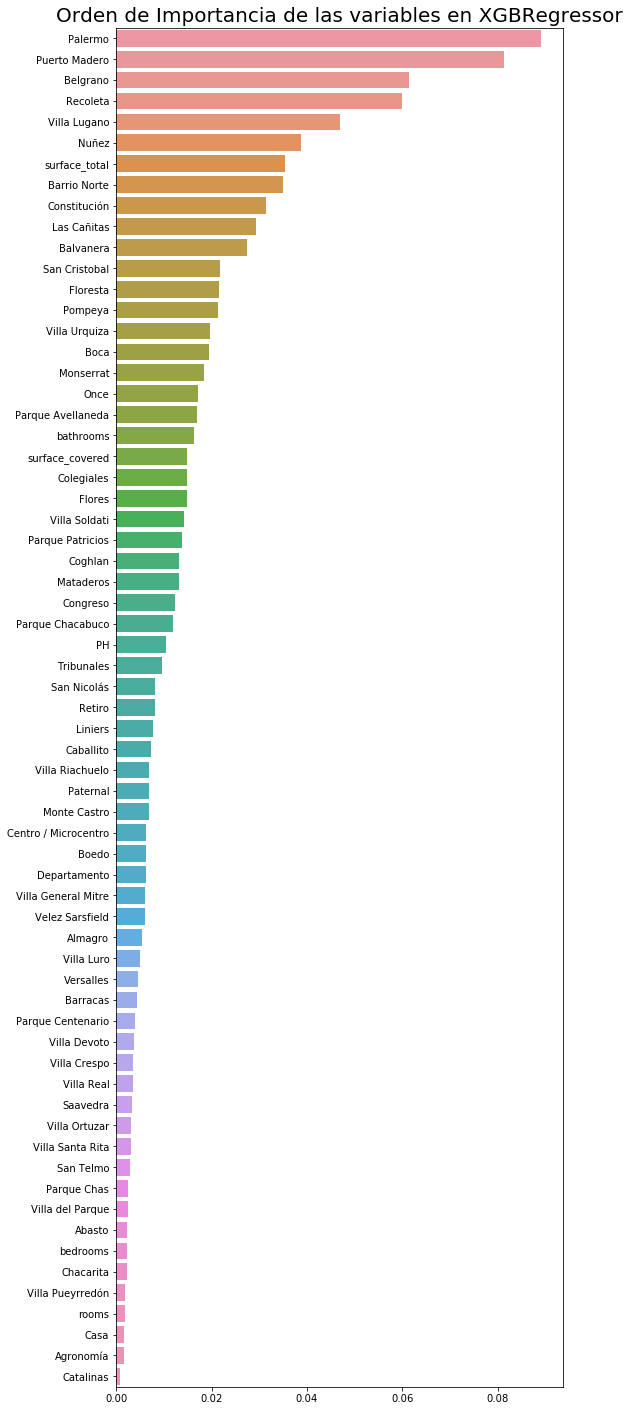

In [460]:
importances = xgb.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (8,25))
plt.title("Orden de Importancia de las variables en XGBRegressor", fontsize= 20)
plt.yticks(rotation= 0, fontsize= 10, horizontalalignment= 'right')
sns.barplot(y=columns[indices], x=importances[indices])
plt.show()

#### Se observa que aquellas variables que fueron más importantes para el modelo son:
- Palermo
- Puerto Madero
- Belgarno
- Recoleta
- Villa Lugano
- Nuñez
- surface_total

#### Las menos importantes:
- Catlinas
- Agronomía
- Casa
- rooms
- Villa Puerredón
- Chacarita
- bedrooms

#### Veamos como es la distribución del error en la predicción:

Modelo: XGBRegressor
Raíz del error cuadrático medio en Train: USD 32951.09
Raíz del error cuadrático medio en Test: USD 38571.94


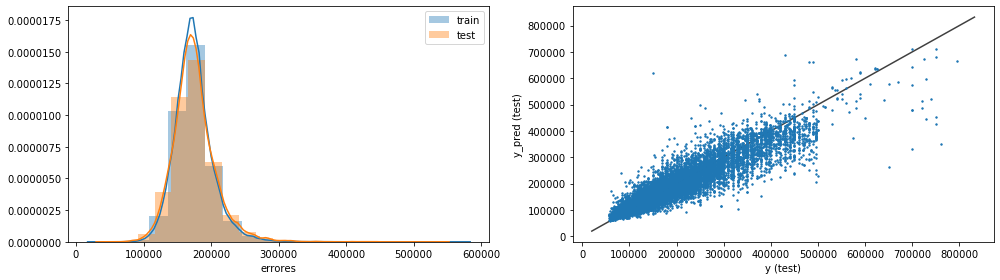

In [461]:
modelos = ['XGBRegressor']

for i, model in enumerate([xgb]):
    y_train_pred = model.predict(X_train).reshape(-1,1)
    y_test_pred = model.predict(X_test).reshape(-1,1)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(reesc(y_train), reesc(y_train_pred)))
    rmse_test = np.sqrt(mean_squared_error(reesc(y_test), reesc(y_test_pred)))
    print("Raíz del error cuadrático medio en Train: USD " + str(round(rmse_train,2)))
    print("Raíz del error cuadrático medio en Test: USD " + str(round(rmse_test,2)))
    
    plt.figure(figsize = (14,4))

    plt.subplot(1,2,1)
    sns.distplot(reesc(y_train - y_train_pred), bins = 20, label = 'train')
    sns.distplot(reesc(y_test - y_test_pred), bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(reesc(y_test),reesc(y_test_pred), s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

### Preguntas:

- ¿Coincide con lo que esperabas a partir de tu experiencia con este dataset?

A partir de mi experiencia trabajando con el dataset hubiese creído que `surface_total` sería la variable más reelevante. Sin embargo, a partir de aplicar la metodología de one-hot-encoding pude lograr nuevas variables que resultaron ser las más reelevantes (como `Palermo`, `Puerto Madero` y `Belgrano`). Supongo que esto se debe a que en dichos barrios se encuentran las propiedades más costosas de `Capital Federal`.

- ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

A partir del scatterplot de las predicciones se observa que el modelo comete el mayor error al predecir propiedades más costosas, siendo su predicción del valor mucho más baja de la real. Esto seguramente se deba a que a partir de los datos del dataset no somos capaces de tener en cuenta los factores más reelevantes para determinar el precio de una propiedad. Algunos de estos son:

- Antigüedad del inmueble.
- Expensas.
- Si tiene SUM, pileta, gimnasio, parilla, etc.
- Seguridad privada.
- Estado de la propiedad.